In [27]:
import pandas as pd
from scipy.spatial import distance
import numpy as np

INDIR = "../../plot_data/5-7/"
# Path to where we will save our processed files
OUTDIR = "../../plots/"

In [28]:
df_treatment = pd.read_csv(INDIR+"/treatment_field_order_prepost.csv",
                              usecols=['MAGAID','RetractionYear','MAGPID','MAGrootFID',
                                      'MAGAffYear'])\
                            .drop_duplicates()\
                            .rename(columns={'MAGAffYear':'MAGPubYear'})

df_control = pd.read_csv(INDIR+"/control_field_order_prepost.csv",
                            usecols=['MAGAID','MatchMAGAID','RetractionYear','MAGPID','MAGrootFID', 
                                    'MAGAffYear'])\
                            .drop_duplicates()\
                            .rename(columns={'MAGAffYear':'MAGPubYear'})

In [16]:
df_treatment['PreOrPost'] = df_treatment\
                            .apply(lambda row: 'Pre' if row['RetractionYear'] >= row['MAGPubYear'] else 'Post', axis=1)


In [17]:
df_control['PreOrPost'] = df_control\
                        .apply(lambda row: 'Pre' if row['RetractionYear'] >= row['MAGPubYear'] else 'Post', axis=1)

In [18]:
# Create a function to compute the vectors
def compute_vectors(df, author_id, fields, author_key):
    pre_vector = [0] * len(fields)
    post_vector = [0] * len(fields)
    
    # Getting data for the current author
    author_data = df[df[author_key] == author_id]
    
    # separating into pre and post
    pre_data = author_data[author_data['PreOrPost'] == 'Pre']
    post_data = author_data[author_data['PreOrPost'] == 'Post']
    
    # Compute counts for pre_vector
    for i, field in enumerate(fields):
        pre_vector[i] = len(pre_data[pre_data['MAGrootFID'] == field])
        post_vector[i] = len(post_data[post_data['MAGrootFID'] == field])
    
    # Convert pre_vector to probability distribution
    total_pre = sum(pre_vector)
    if total_pre > 0:
        pre_vector = [(count / total_pre) * 100 for count in pre_vector]
    
    dist = distance.jensenshannon(np.array(pre_vector), np.array(post_vector))
    
    print(pre_vector, post_vector, dist)
    
    return pre_vector, post_vector, dist


# Create a dictionary to store vectors for each author
author_vectors = {}
fields = df_treatment[~df_treatment['MAGrootFID'].isna()]['MAGrootFID'].unique()
assert(len(fields) == 19)

# Let us compute vectors for treatment first

# Get unique authors
unique_authors_treatment = df_treatment['MAGAID'].unique()

for author in unique_authors_treatment:
    pre_vec, post_vec, dist = compute_vectors(df_treatment, author, fields, 'MAGAID')
    author_vectors[author] = {
        'Pre': pre_vec,
        'Post': post_vec,
        'Dist': dist,
        'ScientistType': 'retracted',
        'MAGAID': author
    }

# Let us do the sampe for control

unique_authors_control = df_control['MatchMAGAID'].unique()

for author in unique_authors_control:
    pre_vec, post_vec, dist = compute_vectors(df_control, author, fields, 'MatchMAGAID')
    author_vectors[author] = {
        'Pre': pre_vec,
        'Post': post_vec,
        'Dist': dist,
        'ScientistType': 'matched',
        'MAGAID': author
    }
    
# Convert the result into a DataFrame for better visualization
author_vectors_df = pd.DataFrame.from_dict(author_vectors, orient='index')


[37.5, 31.25, 12.5, 12.5, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.35170906659130474
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 7, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.36157900963412165
[34.02061855670103, 27.835051546391753, 0.5154639175257731, 0.0, 1.5463917525773196, 0.5154639175257731, 0.5154639175257731, 0.0, 30.927835051546392, 1.5463917525773196, 2.0618556701030926, 0.5154639175257731, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [73, 36, 0, 1, 6, 0, 0, 0, 67, 6, 0, 0, 1, 4, 1, 0, 0, 0, 0] 0.1869528915767789
[32.0, 24.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 32.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.20907178234928023
[40.0, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 33.33333333333333, 6.666666666666667, 6.666666

[34.868421052631575, 26.31578947368421, 0.0, 0.0, 5.263157894736842, 0.0, 0.0, 0.0, 32.89473684210527, 0.6578947368421052, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [23, 22, 0, 0, 3, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.06447935130462791
[44.086021505376344, 33.87096774193548, 0.5376344086021506, 0.0, 3.763440860215054, 2.6881720430107525, 0.0, 0.0, 6.989247311827956, 0.0, 0.0, 0.5376344086021506, 0.0, 2.1505376344086025, 0.0, 3.763440860215054, 0.5376344086021506, 0.0, 1.0752688172043012] [21, 16, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 0.19730983911117753
[36.36363636363637, 27.27272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.36363636363637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3245470761746418
[40.56603773584906, 12.264150943396226, 1.8867924528301887, 0.0, 0.0, 7.547169811320755, 1.8867924528301887, 1.8867924528301887, 33.9622641509434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3

[42.857142857142854, 23.809523809523807, 0.0, 0.0, 0.0, 4.761904761904762, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [16, 12, 0, 0, 4, 0, 2, 0, 11, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0] 0.2934252612377996
[41.66666666666667, 25.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 0.0, 8.333333333333332] [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4357823211021844
[36.09022556390977, 25.563909774436087, 0.0, 0.0, 0.7518796992481203, 0.0, 0.0, 0.0, 34.58646616541353, 2.2556390977443606, 0.0, 0.0, 0.0, 0.7518796992481203, 0.0, 0.0, 0.0, 0.0, 0.0] [17, 8, 0, 0, 0, 1, 0, 0, 18, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0] 0.22279684514332115
[38.18181818181819, 24.545454545454547, 0.0, 0.9090909090909091, 2.727272727272727, 2.727272727272727, 0.0, 0.0, 25.454545454545453, 4.545454545454546, 0.0, 0.0, 0.0, 0.9090909090909091, 0.0, 0.0, 0.0, 0.0, 0.0] [21, 14, 0, 0, 3, 0, 0, 0, 14, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0

[31.08108108108108, 28.37837837837838, 0.0, 0.0, 2.7027027027027026, 0.0, 0.0, 0.0, 29.72972972972973, 6.756756756756757, 0.0, 0.0, 0.0, 1.3513513513513513, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3999799511448044
[33.33333333333333, 20.51282051282051, 0.0, 2.564102564102564, 0.0, 7.6923076923076925, 0.0, 0.0, 12.82051282051282, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.6923076923076925, 5.128205128205128, 2.564102564102564, 7.6923076923076925] [82, 66, 1, 1, 16, 8, 6, 3, 37, 0, 2, 0, 1, 6, 0, 2, 0, 0, 2] 0.3501489195281311
[50.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.328452092654953
[37.17948717948718, 32.69230769230769, 0.0, 0.0, 8.974358974358974, 8.974358974358974, 0.641025641025641, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.641025641025641, 2.564102564102564, 0.0, 0.641025641025641, 0.0, 0.0, 0.0] [7, 2, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 

[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 6, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.18229958133146307
[37.5, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [41, 39, 1, 1, 5, 0, 0, 0, 20, 9, 2, 1, 0, 0, 0, 0, 0, 2, 0] 0.28946787633369514
[37.56613756613756, 25.925925925925924, 0.0, 0.0, 4.232804232804233, 0.0, 0.5291005291005291, 0.0, 30.687830687830687, 0.5291005291005291, 0.0, 0.0, 0.5291005291005291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 12, 1, 0, 1, 0, 1, 0, 9, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.15124613168778045
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.10703679508281445
[32.19178082191781, 25.34246575342466, 0.0, 0.0, 4.10958904109589, 1.36986301369863, 0.684931506849315, 0.0, 

[34.375, 34.375, 0.0, 0.0, 15.625, 0.0, 0.0, 0.0, 15.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3040758973241063
[39.62264150943396, 24.528301886792452, 0.0, 0.0, 5.660377358490567, 1.8867924528301887, 1.8867924528301887, 0.0, 24.528301886792452, 0.0, 0.0, 0.0, 0.0, 1.8867924528301887, 0.0, 0.0, 0.0, 0.0, 0.0] [78, 63, 1, 1, 7, 1, 4, 0, 45, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.11262826945655403
[28.57142857142857, 28.57142857142857, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 2, 0, 0, 2, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.6179690856818852
[26.666666666666668, 26.666666666666668, 0.0, 0.0, 23.333333333333332, 3.3333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.34148203007979394
[33.33333333333333, 28.57142857142857, 0.0, 0.0, 7.142857142857142, 0.

[27.322404371584703, 26.229508196721312, 0.0, 0.546448087431694, 20.76502732240437, 0.0, 0.0, 0.0, 20.21857923497268, 2.185792349726776, 0.546448087431694, 0.0, 0.0, 2.185792349726776, 0.0, 0.0, 0.0, 0.0, 0.0] [271, 263, 0, 3, 103, 6, 2, 0, 167, 17, 1, 0, 1, 19, 0, 0, 0, 1, 0] 0.11202345241473102
[40.50632911392405, 20.253164556962027, 0.0, 0.0, 5.063291139240507, 0.0, 0.0, 0.0, 32.91139240506329, 0.0, 0.0, 0.0, 1.2658227848101267, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [31, 12, 0, 0, 3, 1, 0, 0, 29, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1] 0.18212097479297196
[30.851063829787233, 24.46808510638298, 0.0, 0.0, 6.382978723404255, 4.25531914893617, 0.0, 0.0, 26.595744680851062, 1.0638297872340425, 1.0638297872340425, 0.0, 0.0, 1.0638297872340425, 0.0, 2.127659574468085, 0.0, 0.0, 2.127659574468085] [24, 14, 0, 0, 2, 3, 0, 0, 21, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.17475756076931384
[35.483870967741936, 19.35483870967742, 0.0, 0.0, 0.0, 6.451612903225806, 0.0, 0.0, 24.193548387096776, 6.451612903225806, 0.0, 0.0,

[30.933333333333334, 18.666666666666668, 0.5333333333333333, 0.0, 4.533333333333333, 16.8, 0.5333333333333333, 0.0, 22.133333333333333, 2.666666666666667, 1.6, 0.5333333333333333, 0.8, 0.26666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 0, 1, 0, 0, 3, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.37948374211646296
[23.684210526315788, 18.421052631578945, 0.0, 7.894736842105263, 0.0, 0.0, 0.0, 0.0, 18.421052631578945, 15.789473684210526, 0.0, 5.263157894736842, 0.0, 0.0, 0.0, 0.0, 5.263157894736842, 5.263157894736842, 0.0] [22, 15, 0, 4, 0, 0, 0, 0, 18, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.24734296937876785
[25.0, 25.0, 0.0, 0.0, 18.75, 0.0, 0.0, 0.0, 25.0, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.14974659859432948
[39.39393939393939, 27.27272727272727, 0.0, 0.0, 12.121212121212121, 3.0303030303030303, 6.0606060606060606, 3.0303030303030303, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0303030303030303, 0.0, 3.0303030303030303, 0.0, 0.0, 3.030303

[28.57142857142857, 23.809523809523807, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 4.761904761904762, 9.523809523809524, 0.0, 0.0, 4.761904761904762, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 0.46160094721790923
[27.500000000000004, 20.0, 0.0, 1.25, 6.25, 0.0, 0.0, 0.0, 27.500000000000004, 10.0, 1.25, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0] [66, 62, 0, 0, 12, 7, 2, 0, 51, 30, 0, 0, 4, 6, 0, 0, 0, 0, 0] 0.1910539834310758
[34.48275862068966, 34.48275862068966, 0.0, 0.0, 10.344827586206897, 0.0, 0.0, 0.0, 17.24137931034483, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.4482758620689653, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3219152300740509
[36.11111111111111, 22.22222222222222, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 0.0, 27.77777777777778, 2.7777777777777777, 0.0, 0.0, 2.7777777777777777, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.23509709094788553
[24.836601307189543, 2

[38.46153846153847, 23.076923076923077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.46153846153847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 7, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.033214875653431335
[22.916666666666664, 8.333333333333332, 0.0, 4.166666666666666, 8.333333333333332, 0.0, 18.75, 0.0, 16.666666666666664, 2.083333333333333, 0.0, 0.0, 2.083333333333333, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 1, 0, 0, 1, 0, 2, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.20152326121180714
[25.477707006369428, 25.159235668789808, 0.3184713375796179, 0.0, 9.872611464968154, 0.0, 0.3184713375796179, 0.0, 24.522292993630572, 10.828025477707007, 0.0, 0.3184713375796179, 0.0, 3.1847133757961785, 0.0, 0.0, 0.0, 0.0, 0.0] [46, 44, 0, 0, 11, 0, 0, 0, 45, 32, 0, 0, 1, 1, 0, 0, 0, 0, 0] 0.1299115378184862
[37.5, 37.5, 0.0, 0.0, 4.166666666666666, 4.166666666666666, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 10, 0, 0, 1, 0, 0, 0, 4, 0, 0, 

[20.0, 20.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 20.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2882897555390557
[37.5, 37.5, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 8, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.29696699497375145
[28.448275862068968, 27.586206896551722, 0.0, 0.8620689655172413, 14.655172413793101, 3.4482758620689653, 0.8620689655172413, 0.0, 18.96551724137931, 0.8620689655172413, 0.0, 0.0, 0.0, 4.310344827586207, 0.0, 0.0, 0.0, 0.0, 0.0] [30, 19, 0, 1, 3, 5, 0, 0, 29, 13, 1, 0, 0, 4, 0, 1, 0, 1, 0] 0.2711808964070667
[20.0, 20.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0] 0.0
[36.36363636363637, 36.36363636363637, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 18.181818181818183, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0,

[23.076923076923077, 23.076923076923077, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 23.076923076923077, 7.6923076923076925, 7.6923076923076925, 0.0, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0] [6, 6, 0, 0, 1, 0, 0, 0, 6, 4, 1, 0, 0, 0, 1, 0, 0, 0, 0] 0.12834325092910642
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 0, 0, 0, 0, 0, 0, 0, 8, 8, 1, 0, 0, 0, 1, 0, 0, 0, 0] 0.1656168559460177
[34.48275862068966, 33.33333333333333, 0.0, 0.0, 2.2988505747126435, 2.2988505747126435, 0.0, 0.0, 22.988505747126435, 3.4482758620689653, 1.1494252873563218, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [37, 30, 0, 1, 1, 0, 0, 0, 18, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.15642547398588577
[35.0, 35.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [168, 64, 3, 10, 14, 2, 0, 0, 197, 7, 2, 0, 5, 2, 3, 1, 6, 0, 1] 0.2896073864427427
[34.61538461538461, 34.61538461538461, 0.0

[33.33333333333333, 16.666666666666664, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2547255167806245
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 13.333333333333334, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.12799902843492256
[36.27450980392157, 35.294117647058826, 0.0, 0.0, 9.803921568627452, 11.76470588235294, 0.49019607843137253, 0.0, 2.941176470588235, 0.49019607843137253, 0.0, 0.0, 0.0, 0.49019607843137253, 0.49019607843137253, 0.9803921568627451, 0.0, 0.0, 0.9803921568627451] [24, 22, 0, 0, 3, 15, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.16412520455925966
[43.18181818181818, 34.090909090909086, 0.0, 0.0, 11.363636363636363, 4.545454545454546, 0.0, 0.0, 6.8181818181818175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [20, 14, 0, 4, 12, 3, 5, 1, 9, 0, 0, 0, 

[38.028169014084504, 22.535211267605636, 0.0, 0.0, 2.8169014084507045, 0.0, 0.0, 0.0, 36.61971830985916, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [36, 18, 0, 0, 1, 2, 0, 0, 40, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.14616442104365618
[25.806451612903224, 25.806451612903224, 0.0, 3.225806451612903, 12.903225806451612, 6.451612903225806, 0.0, 0.0, 19.35483870967742, 3.225806451612903, 0.0, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 7, 0, 0, 5, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.27073901606359563
[34.69387755102041, 34.69387755102041, 0.0, 0.0, 10.204081632653061, 0.0, 0.0, 0.0, 20.408163265306122, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [47, 45, 0, 0, 14, 0, 0, 0, 27, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.051460153334074624
[60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [13, 2, 0, 1, 0, 0, 0, 0, 15, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0] 0.30348376788920206
[24.65753424657534, 22.602739726027394, 0.0, 0.0, 5.47945205

[31.25, 29.464285714285715, 0.0, 0.0, 7.142857142857142, 0.8928571428571428, 0.0, 0.0, 30.357142857142854, 0.8928571428571428, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [34, 32, 0, 0, 4, 3, 0, 0, 24, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.11056005384806811
[50.0, 44.44444444444444, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555555555555555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 7, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0] 0.26278870103903207
[32.91925465838509, 32.298136645962735, 0.0, 0.0, 5.590062111801243, 0.6211180124223602, 0.0, 0.0, 22.36024844720497, 4.968944099378882, 0.0, 0.0, 0.0, 1.2422360248447204, 0.0, 0.0, 0.0, 0.0, 0.0] [15, 14, 0, 0, 8, 0, 1, 0, 17, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1] 0.21595981895256433
[28.35820895522388, 22.388059701492537, 0.0, 0.0, 8.955223880597014, 1.4925373134328357, 5.970149253731343, 1.4925373134328357, 19.402985074626866, 0.0, 0.0, 0.0, 0.0, 11.940298507462686, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 

[26.229508196721312, 19.672131147540984, 0.0, 0.0, 18.852459016393443, 0.819672131147541, 0.0, 0.0, 26.229508196721312, 2.459016393442623, 0.0, 0.819672131147541, 0.819672131147541, 3.278688524590164, 0.819672131147541, 0.0, 0.0, 0.0, 0.0] [20, 16, 0, 1, 9, 0, 2, 0, 26, 8, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.20539154013753724
[29.6875, 29.6875, 1.5625, 1.5625, 4.6875, 1.5625, 0.0, 0.0, 29.6875, 0.0, 0.0, 1.5625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [16, 14, 0, 0, 2, 0, 0, 0, 21, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.19516489757681552
[35.294117647058826, 29.411764705882355, 0.0, 0.0, 5.88235294117647, 0.0, 0.0, 0.0, 29.411764705882355, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [16, 13, 0, 1, 2, 0, 0, 0, 21, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.22276847464061428
[35.13513513513514, 13.513513513513514, 0.0, 0.0, 5.405405405405405, 0.0, 0.0, 0.0, 37.83783783783784, 5.405405405405405, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7027027027027026, 0.0, 0.0, 0.0] [36, 11, 2, 1, 1, 4, 0, 0, 31, 3, 3, 0, 4, 0, 0, 0, 2, 1, 

[40.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.31790629480992494
[35.26970954356847, 26.141078838174277, 0.0, 0.4149377593360996, 1.2448132780082988, 0.4149377593360996, 0.4149377593360996, 0.0, 33.19502074688796, 1.2448132780082988, 0.4149377593360996, 0.0, 0.4149377593360996, 0.0, 0.0, 0.8298755186721992, 0.0, 0.0, 0.0] [40, 29, 2, 1, 0, 0, 2, 0, 34, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0] 0.16158672941187474
[25.0, 25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3091966832730143
[31.25, 25.0, 0.0, 0.0, 0.0, 2.083333333333333, 0.0, 0.0, 27.083333333333332, 14.583333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [40, 33, 0, 0, 5, 0, 0, 0, 41, 6, 1, 0, 0, 2, 0, 0, 0, 0, 0] 0.20803624746569757
[26.47058823529412, 17.647058823529413, 0.0, 0.0, 5.88235294117647, 0.0, 0.0, 0.0,

[35.714285714285715, 35.714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.38020212438652934
[30.48780487804878, 28.04878048780488, 0.0, 2.4390243902439024, 10.975609756097562, 4.878048780487805, 0.0, 0.0, 21.951219512195124, 1.2195121951219512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [50, 47, 0, 1, 14, 5, 0, 0, 40, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.10202229926654174
[28.57142857142857, 28.57142857142857, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 0.3025298159081967
[33.33333333333333, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 6.666666666666667, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [19, 12, 0, 1, 3, 0, 0, 0, 17, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0] 0.2727873201155524
[37.5, 25.0, 0.0, 0.0, 8.33333333333333

[36.36363636363637, 27.27272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.090909090909086, 0.0, 2.272727272727273, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.11089420559757032
[35.294117647058826, 35.294117647058826, 0.0, 0.0, 17.647058823529413, 0.0, 0.0, 0.0, 11.76470588235294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2971779323244087
[28.852459016393446, 21.9672131147541, 0.0, 1.4754098360655739, 5.081967213114754, 1.1475409836065573, 1.639344262295082, 0.0, 25.40983606557377, 9.836065573770492, 0.16393442622950818, 0.16393442622950818, 0.6557377049180327, 3.606557377049181, 0.0, 0.0, 0.0, 0.0, 0.0] [30, 25, 0, 0, 8, 1, 0, 0, 21, 7, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.14203664321916815
[34.32835820895522, 32.83582089552239, 0.0, 1.4925373134328357, 7.462686567164178, 2.9850746268656714, 1.4925373134328357, 0.0, 13.432835820895523, 0.0, 2.9850746268656714, 0.0, 0.0, 1.

[30.102040816326532, 27.040816326530614, 0.0, 0.0, 16.83673469387755, 0.5102040816326531, 0.0, 0.0, 22.448979591836736, 1.530612244897959, 0.0, 0.0, 0.5102040816326531, 1.0204081632653061, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 4, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.12225914367619416
[43.75, 31.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [23, 21, 0, 0, 6, 0, 0, 0, 20, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.2480750313950149
[33.07392996108949, 24.90272373540856, 0.0, 0.0, 3.11284046692607, 7.003891050583658, 0.0, 0.0, 30.739299610894943, 0.7782101167315175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.38910505836575876, 0.0, 0.0] [55, 41, 0, 0, 4, 2, 0, 0, 50, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0] 0.13120998361956754
[29.230769230769234, 27.692307692307693, 0.0, 0.0, 10.76923076923077, 6.153846153846154, 0.0, 0.0, 20.0, 6.153846153846154, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [22, 19, 2, 0, 2, 4, 0, 0, 13, 4, 0, 2, 1, 0, 1, 0, 0, 0, 0] 0.2058412993690594


[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.674132307080287
[31.746031746031743, 27.77777777777778, 0.0, 0.0, 5.158730158730158, 0.0, 0.3968253968253968, 0.0, 26.190476190476193, 7.5396825396825395, 0.3968253968253968, 0.0, 0.3968253968253968, 0.3968253968253968, 0.0, 0.0, 0.0, 0.0, 0.0] [86, 78, 1, 1, 14, 0, 0, 0, 58, 11, 0, 1, 0, 3, 1, 1, 1, 0, 2] 0.1387060077359582
[30.08849557522124, 28.31858407079646, 0.0, 0.0, 9.734513274336283, 0.8849557522123894, 0.0, 0.0, 27.43362831858407, 2.6548672566371683, 0.0, 0.0, 0.0, 0.8849557522123894, 0.0, 0.0, 0.0, 0.0, 0.0] [12, 10, 0, 0, 3, 0, 0, 0, 11, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.12481078862735155
[39.03508771929825, 0.43859649122807015, 7.894736842105263, 8.333333333333332, 0.0, 0.0, 0.43859649122807015, 0.0, 34.64912280701755, 2.1929824561403506, 0.8771929824561403, 0.0, 0.43859649122807015, 0.0, 0.0, 0.0, 1.3157894736842104, 4.

[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 5, 1, 0, 1, 1, 0, 0, 16, 3, 0, 2, 1, 4, 1, 0, 4, 1, 0] 0.5345031468185598
[50.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.57041951058525
[35.714285714285715, 35.714285714285715, 0.0, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 21.428571428571427, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [24, 23, 0, 0, 0, 0, 0, 0, 18, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.22551381674165333
[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[30.434782608695656, 26.08695652173913, 0.0, 0.0, 0.0, 4.3478260869565215, 0.0, 0.0, 30.434782608695656, 4.3478260869565215, 4.3478260869565215, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 4, 0, 1,

[37.5, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.45099237862867836
[33.33333333333333, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 3, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.27018941584698986
[33.33333333333333, 26.666666666666668, 0.0, 0.0, 0.0, 13.333333333333334, 0.0, 0.0, 26.666666666666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.03643139567417555
[25.0, 25.0, 0.0, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 25.0, 14.285714285714285, 3.571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1279638587040401
[26.732673267326735, 22.772277227722775, 0.0, 1.9801980198019802, 0.9900990099009901, 0.0, 0.9900990099009901, 0.0, 22.7722

[34.48275862068966, 20.689655172413794, 0.0, 10.344827586206897, 6.896551724137931, 0.0, 3.4482758620689653, 0.0, 17.24137931034483, 0.0, 0.0, 0.0, 6.896551724137931, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [20, 17, 0, 2, 3, 1, 0, 0, 14, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0] 0.23103383582834605
[38.23529411764706, 20.588235294117645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.23529411764706, 2.941176470588235, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.13955767554520757
[30.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 4, 0, 0, 2, 0, 1, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2504893233351945
[38.095238095238095, 37.41496598639456, 0.0, 0.0, 2.7210884353741496, 0.0, 0.0, 0.0, 17.006802721088434, 3.4013605442176873, 0.0, 0.0, 0.0, 1.3605442176870748, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1646947860071875
[36.666666666666664, 16.666666666666664, 0.0, 3.3333

[30.65326633165829, 19.09547738693467, 0.0, 0.0, 3.015075376884422, 1.0050251256281406, 11.557788944723619, 0.0, 28.643216080402013, 1.507537688442211, 0.0, 0.0, 1.507537688442211, 2.0100502512562812, 0.0, 0.5025125628140703, 0.0, 0.0, 0.5025125628140703] [117, 92, 0, 1, 19, 2, 59, 0, 121, 8, 1, 0, 5, 30, 0, 1, 0, 0, 1] 0.10632278733364321
[40.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.23068596029464408
[26.89075630252101, 24.789915966386555, 0.0, 0.0, 5.88235294117647, 1.2605042016806722, 0.42016806722689076, 0.0, 26.05042016806723, 3.7815126050420167, 0.42016806722689076, 0.0, 0.42016806722689076, 8.403361344537815, 0.0, 0.8403361344537815, 0.0, 0.0, 0.8403361344537815] [5, 2, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3022797371148814
[41.07142857142857, 32.142857142857146, 1.7857142857142856, 0.0, 0.0, 3.571428571428571, 3.571428571428571, 1.7857142857142856, 7.

/usr/local/lib/python3.9/site-packages/scipy/spatial/distance.py:1294: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


 [16, 0, 3, 3, 0, 0, 1, 0, 17, 25, 12, 1, 2, 0, 1, 0, 11, 2, 0] 0.22395829903804237
[24.096385542168676, 22.89156626506024, 0.0, 0.0, 8.433734939759036, 12.048192771084338, 16.867469879518072, 10.843373493975903, 0.0, 0.0, 0.0, 0.0, 0.0, 4.819277108433735, 0.0, 0.0, 0.0, 0.0, 0.0] [32, 29, 0, 0, 16, 22, 24, 13, 2, 0, 0, 0, 1, 16, 0, 2, 0, 0, 0] 0.140544262044838
[45.45454545454545, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 45.45454545454545, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 3, 0, 0, 1, 0, 0, 0, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2697722091305908
[36.61971830985916, 28.169014084507044, 0.0, 0.0, 1.4084507042253522, 0.0, 0.0, 0.0, 33.80281690140845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [59, 23, 0, 0, 2, 15, 0, 0, 44, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.21923721416635536
[29.411764705882355, 29.411764705882355, 0.0, 0.0, 17.647058823529413, 0.0, 0.0, 0.0, 17.647058823529413, 2.941176470588235, 0.0, 0.0, 0.0, 2.941176470588235, 0.0, 0.0, 0.0, 0.0, 0.0] 

[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 5, 0, 1, 0, 0, 1, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.2275081255290535
[36.36363636363637, 27.27272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.36363636363637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [15, 14, 0, 0, 0, 0, 0, 0, 13, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.10353078765461743
[45.0, 25.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 0, 0, 0, 4, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 4, 0, 0, 0] 0.649101787781123
[31.48148148148148, 27.037037037037038, 0.0, 0.0, 4.074074074074074, 0.3703703703703704, 0.7407407407407408, 0.0, 27.77777777777778, 3.3333333333333335, 0.3703703703703704, 0.0, 1.1111111111111112, 3.3333333333333335, 0.3703703703703704, 0.0, 0.0, 0.0, 0.0] [66, 11, 0, 1, 0, 1, 0, 0, 67, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0] 0.2754593000959818
[31.25, 31.25, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 31.25, 

[36.87943262411347, 22.69503546099291, 0.0, 0.0, 4.25531914893617, 0.0, 1.4184397163120568, 0.0, 30.49645390070922, 1.4184397163120568, 0.7092198581560284, 0.0, 0.0, 2.127659574468085, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.3349700505418501
[35.483870967741936, 32.25806451612903, 0.0, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 29.03225806451613, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 4, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.08036028409608205
[31.03448275862069, 24.137931034482758, 0.0, 0.0, 13.793103448275861, 0.0, 0.0, 0.0, 20.689655172413794, 6.896551724137931, 0.0, 0.0, 3.4482758620689653, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 8, 1, 0, 2, 0, 0, 0, 14, 8, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.24007851898494376
[26.288659793814436, 16.49484536082474, 0.5154639175257731, 0.0, 5.154639175257731, 0.5154639175257731, 0.0, 0.0, 26.288659793814436, 18.04123711340206, 1.5463917525773196, 0.5154639175257731, 0.5154639175257731, 2.061

[33.33333333333333, 60.0, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.15691447176472706
[11.11111111111111, 19.444444444444446, 0.0, 0.0, 19.444444444444446, 0.0, 16.666666666666664, 0.0, 11.11111111111111, 2.7777777777777777, 0.0, 0.0, 0.0, 19.444444444444446, 0.0, 0.0, 0.0, 0.0, 0.0] [15, 10, 7, 0, 5, 0, 4, 0, 10, 5, 1, 1, 4, 7, 0, 3, 7, 0, 3] 0.41001321139458813
[19.696969696969695, 19.696969696969695, 0.0, 6.0606060606060606, 16.666666666666664, 0.0, 10.606060606060606, 0.0, 12.121212121212121, 3.0303030303030303, 0.0, 0.0, 0.0, 12.121212121212121, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 5, 0, 0, 2, 0, 2, 0, 3, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0] 0.2184290999050556
[34.24657534246575, 35.61643835616438, 0.0, 0.0, 4.10958904109589, 4.10958904109589, 0.0, 0.0, 15.068493150684931, 2.73972602739726, 0.0, 0.0, 0.0, 4.10958904109589, 0.0, 0.0, 0.0, 0.0, 0.0] [22, 16, 0, 0, 0, 0, 1, 0, 17, 0,

[34.48275862068966, 37.93103448275862, 0.0, 0.0, 6.896551724137931, 0.0, 0.0, 0.0, 20.689655172413794, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 7, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.179330346026437
[24.33862433862434, 25.925925925925924, 0.0, 0.0, 6.349206349206349, 0.0, 0.5291005291005291, 0.0, 22.22222222222222, 7.4074074074074066, 0.0, 0.0, 0.5291005291005291, 12.698412698412698, 0.0, 0.0, 0.0, 0.0, 0.0] [21, 22, 0, 0, 1, 0, 0, 0, 19, 4, 0, 0, 0, 6, 0, 0, 0, 0, 0] 0.134099014385029
[25.0, 31.25, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 18.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 8, 0, 0, 1, 0, 0, 0, 7, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0] 0.27792705391652106
[27.943760984182774, 28.119507908611602, 0.0, 0.0, 23.198594024604567, 10.193321616871705, 0.5272407732864675, 0.0, 7.5571177504393665, 0.35149384885764495, 0.0, 0.0, 0.17574692442882248, 1.9332161687170473, 0.0, 0.0, 0.0, 0.0, 0.0] [28, 27, 0, 0, 13, 5, 0, 0, 7, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.11

[15.0, 35.0, 0.0, 25.0, 20.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3367817634902514
[23.076923076923077, 25.0, 0.0, 0.0, 11.538461538461538, 0.0, 0.0, 0.0, 21.153846153846153, 13.461538461538462, 0.0, 0.0, 0.0, 5.769230769230769, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 3, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2822436939623804
[3.0303030303030303, 33.33333333333333, 0.0, 3.0303030303030303, 24.242424242424242, 0.0, 6.0606060606060606, 0.0, 6.0606060606060606, 0.0, 0.0, 0.0, 0.0, 24.242424242424242, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 5, 0, 1, 9, 2, 4, 0, 0, 0, 0, 0, 1, 4, 0, 3, 1, 0, 2] 0.3866991210534964
[37.03703703703704, 37.03703703703704, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 14.814814814814813, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.21004236580482596
[24.705882352941178, 25.882352941176475, 0.0, 0.0, 10.5882352941176

[34.32835820895522, 34.32835820895522, 0.0, 0.0, 4.477611940298507, 1.4925373134328357, 0.0, 0.0, 22.388059701492537, 1.4925373134328357, 0.0, 0.0, 1.4925373134328357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [234, 211, 0, 0, 50, 24, 6, 0, 140, 4, 0, 3, 4, 7, 0, 0, 0, 0, 0] 0.12106298630285992
[11.11111111111111, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4500482352632467
[25.0, 58.333333333333336, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.25797924786755466
[24.59016393442623, 25.683060109289617, 0.0, 0.0, 13.114754098360656, 14.754098360655737, 1.092896174863388, 0.0, 3.825136612021858, 0.0, 0.0, 0.0, 0.0, 6.557377049180328, 10.382513661202186, 0.0, 0.0, 0.0, 0.0] [6, 6, 0, 0, 3, 4, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

[25.806451612903224, 29.03225806451613, 0.0, 0.0, 9.67741935483871, 22.58064516129032, 0.0, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 0.0, 9.67741935483871, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.29772148819390337
[35.0, 35.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 13.333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6666666666666667, 0.0, 0.0] [8, 8, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.12292147958979498
[29.629629629629626, 29.629629629629626, 0.0, 1.8518518518518516, 11.11111111111111, 0.0, 0.0, 0.0, 20.37037037037037, 5.555555555555555, 0.0, 0.0, 0.0, 1.8518518518518516, 0.0, 0.0, 0.0, 0.0, 0.0] [33, 27, 0, 2, 12, 0, 0, 0, 28, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.14003910494324792
[16.312056737588655, 16.312056737588655, 1.4184397163120568, 2.127659574468085, 10.638297872340425, 0.7092198581560284, 9.929078014184398, 0.0, 15.602836879432624, 8.51063829787234, 0.0, 0.7092198581560284, 2.127659574468085, 12.76595744680851, 0.70921985

[25.71428571428571, 27.142857142857142, 0.0, 0.0, 17.142857142857142, 0.0, 2.857142857142857, 0.0, 17.142857142857142, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 8, 0, 1, 6, 1, 0, 0, 6, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0] 0.2278386450740749
[25.0, 25.0, 0.0, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2718586704578313
[26.666666666666668, 26.666666666666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 26.666666666666668, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 9, 0, 1, 1, 0, 0, 0, 10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1361542893046377
[26.31578947368421, 34.21052631578947, 0.0, 0.0, 13.157894736842104, 0.0, 0.0, 0.0, 10.526315789473683, 2.631578947368421, 0.0, 0.0, 0.0, 10.526315789473683, 0.0, 0.0, 2.631578947368421, 0.0, 0.0] [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.6393285857683964
[18.181818181818183, 45.4

[23.809523809523807, 38.095238095238095, 0.0, 4.761904761904762, 23.809523809523807, 4.761904761904762, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.761904761904762, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [30, 40, 0, 6, 20, 3, 3, 0, 4, 1, 0, 0, 5, 2, 0, 0, 0, 0, 0] 0.18725398211182334
[23.076923076923077, 23.931623931623932, 0.0, 0.8547008547008548, 10.256410256410255, 1.7094017094017095, 9.401709401709402, 0.0, 11.965811965811966, 3.418803418803419, 0.8547008547008548, 0.0, 1.7094017094017095, 12.82051282051282, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 6, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.25562853930987284
[18.103448275862068, 27.586206896551722, 0.0, 0.8620689655172413, 18.103448275862068, 2.586206896551724, 12.068965517241379, 0.0, 3.4482758620689653, 0.0, 0.0, 0.0, 0.0, 17.24137931034483, 0.0, 0.0, 0.0, 0.0, 0.0] [20, 29, 0, 2, 19, 0, 15, 0, 6, 2, 0, 0, 0, 20, 0, 0, 0, 0, 0] 0.13173985673440958
[30.76923076923077, 38.46153846153847, 0.0, 0.0, 7.6923076923076925, 0.0, 7.6923076923076925, 0.0, 0.0,

[0.0, 0.0, 11.538461538461538, 3.8461538461538463, 0.0, 0.0, 0.0, 0.0, 30.76923076923077, 30.76923076923077, 3.8461538461538463, 3.8461538461538463, 3.8461538461538463, 0.0, 0.0, 0.0, 11.538461538461538, 0.0, 0.0] [2, 0, 3, 0, 0, 0, 1, 0, 4, 3, 0, 1, 0, 0, 0, 0, 4, 0, 0] 0.3515387925396547
[21.73913043478261, 0.0, 4.3478260869565215, 0.0, 0.0, 0.0, 4.3478260869565215, 0.0, 13.043478260869565, 30.434782608695656, 13.043478260869565, 0.0, 8.695652173913043, 0.0, 0.0, 0.0, 0.0, 4.3478260869565215, 0.0] [48, 0, 7, 6, 3, 2, 4, 0, 47, 65, 25, 2, 8, 0, 0, 1, 15, 13, 1] 0.24006760924618462
[10.084033613445378, 0.0, 10.92436974789916, 8.403361344537815, 2.5210084033613445, 0.0, 5.042016806722689, 0.0, 8.403361344537815, 18.487394957983195, 6.722689075630252, 5.88235294117647, 5.042016806722689, 0.0, 2.5210084033613445, 2.5210084033613445, 6.722689075630252, 3.361344537815126, 3.361344537815126] [16, 3, 13, 27, 1, 0, 5, 0, 18, 25, 12, 9, 11, 1, 0, 0, 14, 6, 0] 0.2307356464616351
[12.5, 0.0, 10.7

[0.0, 7.142857142857142, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 0.0, 42.857142857142854, 28.57142857142857, 0.0, 0.0, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 7.142857142857142, 0.0] [0, 0, 0, 1, 0, 0, 0, 0, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2852231476344474
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 66.66666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [57, 4, 1, 1, 4, 19, 3, 0, 80, 4, 0, 0, 3, 2, 0, 2, 1, 0, 1] 0.3123902241666818
[29.545454545454547, 18.181818181818183, 0.0, 2.272727272727273, 4.545454545454546, 0.0, 0.0, 0.0, 31.818181818181817, 13.636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 2, 1, 0, 2, 0, 0, 0, 12, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.27322573860702026
[34.90566037735849, 5.660377358490567, 0.9433962264150944, 2.8301886792452833, 0.9433962264150944, 0.0, 2.8301886792452833, 0.0, 38.67924528301887, 10.377358490566039, 0.0, 0.0, 2.8301886792452833, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 5, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0

[32.0, 32.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4903336481027439
[25.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 62.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [13, 4, 0, 0, 1, 0, 1, 0, 13, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0] 0.31301161181597625
[0.0, 8.0, 0.0, 4.0, 8.0, 0.0, 20.0, 0.0, 24.0, 4.0, 0.0, 0.0, 0.0, 24.0, 0.0, 4.0, 0.0, 0.0, 4.0] [9, 0, 0, 4, 12, 1, 7, 0, 19, 9, 0, 0, 5, 7, 0, 0, 0, 0, 0] 0.4139454899420692
[35.80786026200873, 1.7467248908296942, 0.43668122270742354, 2.6200873362445414, 0.43668122270742354, 0.8733624454148471, 0.8733624454148471, 0.0, 45.414847161572055, 8.296943231441048, 0.0, 0.43668122270742354, 0.43668122270742354, 0.0, 0.0, 0.0, 2.6200873362445414, 0.0, 0.0] [91, 1, 5, 21, 11, 3, 1, 0, 155, 71, 5, 12, 6, 0, 1, 3, 18, 1, 3] 0.22010900957701302
[14.285714285714285, 7.8817733990147785, 2.955665024630542, 2.955665024630542, 0.49261083743842365, 0.4

[42.30769230769231, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.30769230769231, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [32, 8, 1, 0, 1, 0, 0, 0, 33, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0] 0.14746138360311056
[29.1866028708134, 28.22966507177033, 0.4784688995215311, 0.9569377990430622, 1.4354066985645932, 0.0, 0.0, 0.0, 35.88516746411483, 1.9138755980861244, 0.0, 0.0, 0.4784688995215311, 0.0, 0.0, 0.0, 1.4354066985645932, 0.0, 0.0] [30, 28, 1, 3, 0, 0, 0, 0, 36, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.12528245538848756
[50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5429402540654636
[23.214285714285715, 1.7857142857142856, 0.0, 5.357142857142857, 5.357142857142857, 1.7857142857142856, 1.7857142857142856, 0.0, 41.07142857142857, 5.357142857142857, 3.571428571428571, 0.0, 5.357142857142857, 1.7857142857142856, 0.0, 1.7857142857142856, 0.0, 0.0, 1.7857142857142856

[27.27272727272727, 8.333333333333332, 0.0, 1.5151515151515151, 1.5151515151515151, 0.7575757575757576, 0.0, 0.0, 34.090909090909086, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7575757575757576, 0.7575757575757576, 0.0] [21, 7, 1, 3, 0, 1, 0, 0, 29, 22, 1, 0, 1, 1, 1, 0, 1, 1, 0] 0.1664914534890946
[35.82089552238806, 13.432835820895523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.298507462686565, 4.477611940298507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.9850746268656714, 2.9850746268656714, 0.0] [144, 69, 0, 3, 17, 1, 2, 0, 148, 5, 0, 0, 2, 0, 0, 0, 3, 1, 0] 0.19648130791631938
[15.942028985507244, 0.0, 0.0, 0.0, 0.0, 0.7246376811594203, 0.0, 0.0, 52.89855072463768, 23.91304347826087, 5.072463768115942, 0.0, 0.0, 0.0, 0.0, 0.7246376811594203, 0.0, 0.0, 0.7246376811594203] [15, 4, 0, 0, 2, 0, 0, 0, 27, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0] 0.34141603056205216
[31.11111111111111, 0.0, 0.0, 2.2222222222222223, 0.0, 6.666666666666667, 4.444444444444445, 0.0, 33.33333333333333, 6.666666666666667, 0.0, 0.0, 2.22222222222

[25.806451612903224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.25806451612903, 32.25806451612903, 0.0, 0.0, 9.67741935483871, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 1, 1, 0, 1, 0, 2, 0, 7, 7, 1, 0, 0, 0, 1, 0, 0, 0, 0] 0.35709041873764596
[22.22222222222222, 22.22222222222222, 0.0, 0.0, 3.7037037037037033, 0.0, 0.0, 0.0, 29.629629629629626, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.09162057405756249
[29.47368421052631, 8.421052631578947, 0.0, 0.0, 2.1052631578947367, 1.0526315789473684, 0.0, 0.0, 41.05263157894737, 14.736842105263156, 2.1052631578947367, 0.0, 1.0526315789473684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.24614820677937618
[27.55102040816326, 24.489795918367346, 3.061224489795918, 3.061224489795918, 0.0, 0.0, 0.0, 0.0, 32.6530612244898, 4.081632653061225, 0.0, 2.0408163265306123, 1.0204081632653061, 0.0, 0.0, 0.0, 2.0408163265306123, 0.0, 0.0] [12, 12,

[29.906542056074763, 8.411214953271028, 0.9345794392523363, 0.9345794392523363, 4.672897196261682, 1.8691588785046727, 0.9345794392523363, 0.0, 40.18691588785047, 6.5420560747663545, 0.9345794392523363, 0.0, 1.8691588785046727, 1.8691588785046727, 0.0, 0.9345794392523363, 0.0, 0.0, 0.0] [9, 4, 0, 0, 1, 1, 0, 0, 12, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.21242604203666315
[18.75, 15.625, 0.0, 0.0, 6.25, 6.25, 6.25, 0.0, 18.75, 15.625, 0.0, 0.0, 6.25, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 3, 0, 0, 1, 1, 1, 0, 5, 5, 0, 0, 1, 2, 0, 0, 0, 0, 0] 0.0906206791844071
[29.166666666666668, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 7, 0, 1, 0, 0, 0, 0, 13, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.21022519613098586
[26.190476190476193, 4.761904761904762, 0.0, 4.761904761904762, 11.904761904761903, 2.380952380952381, 0.0, 0.0, 33.33333333333333, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 3, 0, 0, 3,

[20.88607594936709, 12.025316455696203, 0.0, 0.0, 2.5316455696202533, 0.0, 0.0, 0.0, 39.87341772151899, 23.417721518987342, 0.0, 0.0, 0.0, 1.2658227848101267, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 4, 1, 6, 0, 0, 0, 0, 40, 21, 4, 0, 0, 0, 2, 0, 1, 1, 0] 0.2969692446073026
[26.82926829268293, 26.82926829268293, 0.0, 0.0, 0.0, 0.0, 1.2195121951219512, 0.0, 29.268292682926827, 7.317073170731707, 0.0, 0.0, 7.317073170731707, 1.2195121951219512, 0.0, 0.0, 0.0, 0.0, 0.0] [18, 16, 0, 0, 2, 0, 0, 0, 16, 3, 0, 0, 11, 1, 0, 0, 0, 0, 0] 0.16466549320397939
[28.09917355371901, 25.6198347107438, 0.8264462809917356, 0.0, 1.6528925619834711, 0.8264462809917356, 0.0, 0.0, 28.09917355371901, 14.049586776859504, 0.0, 0.8264462809917356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [17, 12, 0, 0, 2, 0, 1, 0, 16, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.15884516786734493
[24.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 48.0, 8.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0] [3, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.35472

[45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1500499345295736
[31.03448275862069, 27.586206896551722, 0.0, 0.0, 0.0, 1.7241379310344827, 1.7241379310344827, 0.0, 34.48275862068966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7241379310344827, 0.0, 0.0, 1.7241379310344827] [51, 24, 2, 4, 3, 1, 0, 0, 86, 8, 2, 0, 0, 0, 0, 1, 2, 0, 1] 0.2619841683933037
[30.434782608695656, 21.73913043478261, 0.0, 0.0, 0.0, 8.695652173913043, 0.0, 0.0, 39.130434782608695, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.39890946407409816
[20.0, 4.0, 0.0, 12.0, 0.0, 8.0, 0.0, 0.0, 28.000000000000004, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0] [8, 0, 1, 0, 0, 5, 0, 0, 6, 1, 0, 0, 0, 1, 1, 3, 1, 3, 3] 0.37748343466784584
[22.22222222222222, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 27.77777777777778, 0.0, 0.0, 0.0, 

[29.72972972972973, 24.324324324324326, 0.0, 0.0, 10.81081081081081, 0.0, 0.0, 0.0, 32.432432432432435, 0.0, 0.0, 0.0, 0.0, 2.7027027027027026, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 13, 0, 1, 4, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1356184716353553
[32.0, 3.0, 1.0, 0.0, 2.0, 3.0, 2.0, 0.0, 38.0, 15.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0] [9, 1, 0, 0, 1, 2, 2, 0, 10, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.17331920845270904
[26.53061224489796, 18.367346938775512, 0.0, 0.0, 8.16326530612245, 16.3265306122449, 0.0, 0.0, 26.53061224489796, 2.0408163265306123, 0.0, 0.0, 0.0, 2.0408163265306123, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.14010817870936781
[20.0, 17.142857142857142, 0.0, 0.0, 8.571428571428571, 0.0, 5.714285714285714, 0.0, 20.0, 0.0, 2.857142857142857, 2.857142857142857, 5.714285714285714, 0.0, 5.714285714285714, 5.714285714285714, 0.0, 0.0, 5.714285714285714] [4, 4, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.443309933657442

[32.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 44.0, 8.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [71, 6, 8, 8, 10, 2, 9, 0, 97, 22, 0, 0, 9, 0, 0, 0, 11, 1, 0] 0.25777739479304046
[34.29752066115703, 20.66115702479339, 0.0, 0.8264462809917356, 1.2396694214876034, 0.4132231404958678, 2.066115702479339, 0.0, 34.29752066115703, 2.8925619834710745, 0.8264462809917356, 0.0, 0.0, 1.6528925619834711, 0.0, 0.4132231404958678, 0.0, 0.0, 0.4132231404958678] [60, 22, 1, 0, 4, 0, 1, 0, 59, 1, 0, 1, 0, 4, 0, 0, 2, 0, 0] 0.17514561048775124
[21.153846153846153, 7.6923076923076925, 5.769230769230769, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 28.846153846153843, 9.615384615384617, 3.8461538461538463, 1.9230769230769231, 7.6923076923076925, 0.0, 0.0, 0.0, 1.9230769230769231, 3.8461538461538463, 0.0] [11, 3, 0, 1, 2, 3, 4, 0, 14, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.4004841893678864
[15.384615384615385, 7.6923076923076925, 0.0, 3.8461538461538463, 3.8461538461538463, 0.0, 0.0, 0.0, 38.46153846153847, 26.92307

[13.953488372093023, 4.651162790697675, 0.0, 2.3255813953488373, 11.627906976744185, 0.0, 6.976744186046512, 0.0, 32.55813953488372, 4.651162790697675, 9.30232558139535, 0.0, 6.976744186046512, 0.0, 0.0, 6.976744186046512, 0.0, 0.0, 0.0] [5, 0, 0, 6, 5, 2, 1, 0, 5, 5, 0, 0, 7, 0, 0, 4, 0, 0, 0] 0.37794656656825526
[27.27272727272727, 24.242424242424242, 0.0, 0.0, 3.0303030303030303, 0.0, 3.0303030303030303, 0.0, 36.36363636363637, 3.0303030303030303, 0.0, 0.0, 3.0303030303030303, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.21785240362875988
[35.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.16223254509663365
[29.629629629629626, 18.51851851851852, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 7.4074074074074066, 7.4074074074074066, 0.0, 3.7037037037037033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [39, 32, 0, 0, 6, 0, 0, 0, 40, 7, 11, 0, 0, 0,

[20.0, 8.235294117647058, 0.0, 1.1764705882352942, 7.0588235294117645, 0.0, 0.0, 0.0, 36.470588235294116, 20.0, 2.3529411764705883, 0.0, 0.0, 3.5294117647058822, 0.0, 0.0, 1.1764705882352942, 0.0, 0.0] [7, 1, 0, 0, 3, 0, 0, 0, 20, 10, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.19834036402839716
[26.598465473145783, 6.3938618925831205, 0.5115089514066496, 1.0230179028132993, 5.3708439897698215, 0.0, 0.2557544757033248, 0.0, 31.9693094629156, 15.089514066496163, 8.439897698209718, 0.5115089514066496, 0.2557544757033248, 0.2557544757033248, 0.0, 2.3017902813299234, 0.7672634271099744, 0.0, 0.2557544757033248] [221, 55, 18, 13, 15, 7, 5, 0, 318, 131, 94, 8, 5, 0, 0, 11, 30, 0, 0] 0.13737728128063004
[28.26086956521739, 23.91304347826087, 0.0, 0.0, 2.1739130434782608, 0.0, 2.1739130434782608, 0.0, 32.608695652173914, 6.521739130434782, 4.3478260869565215, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [13, 6, 0, 2, 0, 0, 0, 0, 18, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.22017893673615416
[21.428571428571427, 21.4285714

[15.887850467289718, 3.7383177570093453, 0.0, 0.9345794392523363, 9.345794392523365, 0.0, 0.0, 0.0, 38.31775700934579, 19.626168224299064, 2.803738317757009, 0.0, 0.9345794392523363, 0.9345794392523363, 0.0, 6.5420560747663545, 0.9345794392523363, 0.0, 0.0] [10, 3, 1, 4, 2, 0, 1, 0, 27, 13, 1, 0, 2, 2, 0, 1, 2, 0, 0] 0.2165128864744776
[22.962962962962962, 9.62962962962963, 1.1111111111111112, 2.5925925925925926, 0.7407407407407408, 0.7407407407407408, 2.5925925925925926, 0.0, 44.074074074074076, 5.185185185185185, 0.0, 1.1111111111111112, 0.3703703703703704, 0.7407407407407408, 0.3703703703703704, 1.8518518518518516, 2.9629629629629632, 1.4814814814814816, 1.4814814814814816] [54, 23, 22, 11, 4, 2, 4, 0, 110, 18, 0, 2, 5, 0, 0, 4, 25, 2, 4] 0.1818353798803662
[31.818181818181817, 9.090909090909092, 0.0, 0.0, 13.636363636363635, 0.0, 0.0, 0.0, 31.818181818181817, 9.090909090909092, 4.545454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 

[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.5, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4878515423751423
[21.428571428571427, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333, 0.0, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 2.380952380952381, 2.380952380952381, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2185879440524813
[31.25, 0.0, 0.0, 0.0, 6.25, 6.25, 6.25, 0.0, 37.5, 6.25, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 5, 0, 0, 0, 1, 0, 0, 10, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.362257184366179
[29.03225806451613, 12.903225806451612, 0.0, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 32.25806451612903, 22.58064516129032, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 10, 0, 0, 2, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.13669393118357961
[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 1, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 

[18.75, 12.5, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 43.75, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 4, 0, 0, 0, 0, 4, 0, 8, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0] 0.11758031409236272
[22.22222222222222, 16.666666666666664, 0.0, 0.0, 5.555555555555555, 0.0, 5.555555555555555, 0.0, 27.77777777777778, 11.11111111111111, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 2, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.46856163651753113
[30.0, 10.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2862661262126202
[20.238095238095237, 1.1904761904761905, 0.0, 1.1904761904761905, 0.0, 0.0, 0.0, 0.0, 46.42857142857143, 27.380952380952383, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1904761904761905, 1.1904761904761905, 0.0, 1.1904761904761905] [2, 1, 0, 0, 0, 0, 0, 0, 15, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.19642311047879518
[37.704918032786885, 9.836065573770492, 1.639344262295082, 3.27868852459016

[21.21212121212121, 6.0606060606060606, 0.0, 1.5151515151515151, 4.545454545454546, 3.0303030303030303, 3.0303030303030303, 0.0, 42.42424242424242, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5151515151515151, 0.0, 0.0, 0.0] [8, 2, 0, 0, 2, 1, 0, 0, 11, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.22081773230825777
[0.0, 0.0, 0.0, 27.27272727272727, 0.0, 0.0, 0.0, 0.0, 45.45454545454545, 18.181818181818183, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.7551601491532342
[27.27272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.36363636363637, 18.181818181818183, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.090909090909092, 9.090909090909092, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3852181684652194
[36.36363636363637, 27.27272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.36363636363637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.046654647762866784
[2

[33.07086614173229, 2.3622047244094486, 0.0, 1.574803149606299, 0.7874015748031495, 0.0, 0.0, 0.0, 47.24409448818898, 11.811023622047244, 0.7874015748031495, 0.0, 1.574803149606299, 0.0, 0.0, 0.7874015748031495, 0.0, 0.0, 0.0] [16, 4, 1, 1, 3, 1, 0, 0, 27, 12, 0, 0, 0, 0, 0, 2, 1, 0, 0] 0.21501007895188526
[30.76923076923077, 30.76923076923077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.61538461538461, 3.8461538461538463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 7, 1, 0, 2, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 0.2668047565262035
[30.96446700507614, 26.903553299492383, 0.0, 0.0, 5.583756345177665, 0.0, 0.0, 0.0, 31.472081218274113, 2.5380710659898478, 0.0, 0.0, 0.0, 2.5380710659898478, 0.0, 0.0, 0.0, 0.0, 0.0] [12, 9, 0, 0, 0, 0, 0, 0, 12, 4, 0, 0, 0, 2, 0, 1, 0, 0, 1] 0.22587385359868595
[29.09090909090909, 12.727272727272727, 0.0, 0.0, 3.6363636363636362, 1.8181818181818181, 3.6363636363636362, 0.0, 36.36363636363637, 3.6363636363636362, 0.0, 0.0, 3.6363636363636362, 5.454545454545

[35.22727272727273, 11.363636363636363, 0.0, 0.0, 0.0, 1.1363636363636365, 3.4090909090909087, 1.1363636363636365, 44.31818181818182, 3.4090909090909087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.19707902806080357
[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.5, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.43611676524101767
[18.181818181818183, 9.090909090909092, 0.0, 0.0, 13.636363636363635, 0.0, 0.0, 0.0, 40.909090909090914, 18.181818181818183, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.4194870419477644
[25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0] 0.5302523666231054
[20.0, 5.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 45.0, 25.0, 0.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 1, 0, 0, 0

[33.33333333333333, 0.0, 0.0, 0.0, 18.181818181818183, 0.0, 3.0303030303030303, 0.0, 45.45454545454545, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 0, 0, 0, 2, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1114473333072877
[35.0, 0.0, 0.0, 2.5, 5.0, 0.0, 2.5, 0.0, 42.5, 7.5, 2.5, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 0, 0, 0, 1, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3126004471954412
[25.853658536585368, 13.170731707317074, 0.975609756097561, 0.4878048780487805, 16.097560975609756, 0.0, 0.0, 0.0, 27.80487804878049, 12.682926829268293, 0.4878048780487805, 0.975609756097561, 0.4878048780487805, 0.4878048780487805, 0.4878048780487805, 0.0, 0.0, 0.0, 0.0] [26, 16, 0, 0, 20, 3, 3, 0, 31, 11, 1, 0, 0, 2, 0, 3, 0, 0, 1] 0.21353072475160145
[31.63265306122449, 10.204081632653061, 0.0, 2.0408163265306123, 5.1020408163265305, 1.0204081632653061, 1.0204081632653061, 0.0, 35.714285714285715, 5.1020408163265305, 6.122448979591836, 0.0, 0.0, 1.0204081632653061, 0.0, 1.020408163265

[6.081081081081082, 10.135135135135135, 0.6756756756756757, 0.0, 27.7027027027027, 0.0, 18.243243243243242, 0.0, 0.0, 0.0, 0.0, 0.6756756756756757, 7.4324324324324325, 29.054054054054053, 0.0, 0.0, 0.0, 0.0, 0.0] [21, 46, 0, 4, 103, 1, 68, 0, 1, 0, 0, 0, 21, 97, 0, 1, 0, 0, 0] 0.11352065233226327
[1.6260162601626018, 23.577235772357724, 0.0, 0.8130081300813009, 26.82926829268293, 0.0, 17.88617886178862, 0.0, 0.8130081300813009, 0.8130081300813009, 0.0, 0.0, 0.0, 26.82926829268293, 0.0, 0.8130081300813009, 0.0, 0.0, 0.0] [3, 19, 0, 0, 20, 1, 15, 0, 1, 0, 1, 0, 3, 18, 0, 0, 0, 1, 0] 0.19379008330143635
[3.3333333333333335, 18.333333333333332, 0.0, 3.3333333333333335, 5.0, 1.6666666666666667, 6.666666666666667, 0.0, 25.0, 0.0, 0.0, 0.0, 3.3333333333333335, 31.666666666666664, 1.6666666666666667, 0.0, 0.0, 0.0, 0.0] [0, 4, 0, 2, 4, 0, 0, 0, 9, 0, 0, 0, 2, 10, 5, 0, 0, 0, 0] 0.2858715706309168
[5.263157894736842, 16.842105263157894, 0.0, 1.0526315789473684, 25.263157894736842, 1.05263157894

[0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 6, 12, 10, 0, 15, 1, 0, 1, 0, 0, 11, 8, 0, 1, 2, 0, 0] 0.5305583807156518
[4.597701149425287, 27.586206896551722, 0.0, 2.2988505747126435, 43.67816091954023, 0.0, 1.1494252873563218, 0.0, 1.1494252873563218, 0.0, 1.1494252873563218, 0.0, 0.0, 18.39080459770115, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 33, 0, 3, 45, 0, 3, 0, 6, 2, 1, 0, 2, 9, 0, 0, 0, 0, 0] 0.1818422896338935
[5.405405405405405, 6.081081081081082, 0.6756756756756757, 22.2972972972973, 22.972972972972975, 0.6756756756756757, 15.54054054054054, 0.0, 1.3513513513513513, 4.054054054054054, 4.054054054054054, 0.0, 2.027027027027027, 4.72972972972973, 3.3783783783783785, 2.027027027027027, 4.054054054054054, 0.0, 0.6756756756756757] [4, 1, 0, 14, 15, 1, 10, 0, 3, 2, 1, 0, 3, 2, 0, 2, 2, 0, 0] 0.19496256418543506
[1.7241379310344827, 6.896551724137931, 0.0, 3.4482758620689653, 22.413793103448278, 1.7241379310344827, 20.689655172413794

[16.666666666666664, 0.0, 0.0, 5.555555555555555, 33.33333333333333, 0.0, 27.77777777777778, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 5.555555555555555, 0.0, 0.0, 0.0] [0, 1, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0] 0.4003729829427999
[0.0, 12.0, 0.0, 22.0, 30.0, 0.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 4.0, 0.0, 0.0, 0.0] [0, 4, 0, 11, 14, 1, 10, 0, 0, 0, 0, 0, 6, 2, 0, 4, 0, 0, 0] 0.1613330814815006
[21.06135986733002, 7.2968490878938645, 0.16583747927031509, 2.8192371475953566, 25.04145936981758, 20.8955223880597, 6.633499170812604, 0.0, 0.16583747927031509, 0.0, 0.16583747927031509, 0.16583747927031509, 8.955223880597014, 2.321724709784411, 0.0, 2.8192371475953566, 0.4975124378109453, 0.0, 0.9950248756218906] [58, 14, 1, 17, 72, 60, 23, 0, 1, 0, 2, 0, 23, 0, 0, 6, 2, 0, 2] 0.12239824334347334
[0.0, 2.1739130434782608, 0.0, 8.695652173913043, 23.91304347826087, 0.0, 21.73913043478261, 0.0, 0.0, 0.0, 0.0, 0.0, 15.217391304347828, 23.91304347826087, 0.

[0.0, 0.0, 1.0309278350515463, 20.618556701030926, 26.804123711340207, 0.0, 23.711340206185564, 1.0309278350515463, 0.0, 4.123711340206185, 1.0309278350515463, 0.0, 2.0618556701030926, 2.0618556701030926, 1.0309278350515463, 16.49484536082474, 0.0, 0.0, 0.0] [0, 1, 1, 3, 8, 2, 5, 2, 0, 0, 0, 0, 3, 1, 0, 4, 0, 0, 0] 0.31482887463409037
[0.0, 0.0, 0.0, 4.545454545454546, 45.45454545454545, 0.0, 40.909090909090914, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.545454545454546, 0.0, 4.545454545454546, 0.0, 0.0, 0.0] [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.22378090994706865
[1.1111111111111112, 18.88888888888889, 0.0, 1.1111111111111112, 21.11111111111111, 0.0, 20.0, 11.11111111111111, 0.0, 1.1111111111111112, 0.0, 0.0, 0.0, 21.11111111111111, 0.0, 2.2222222222222223, 0.0, 0.0, 2.2222222222222223] [4, 20, 1, 14, 28, 9, 29, 8, 0, 2, 0, 1, 10, 27, 1, 9, 0, 0, 0] 0.2969694000177814
[1.6326530612244898, 25.71428571428571, 0.0, 1.6326530612244898, 27.755102040816325, 0.0, 12.65306122448979

[3.225806451612903, 19.35483870967742, 0.0, 0.0, 25.806451612903224, 0.0, 22.58064516129032, 0.0, 0.0, 3.225806451612903, 0.0, 0.0, 6.451612903225806, 19.35483870967742, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 6, 0, 0, 7, 0, 3, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0] 0.2434922317313566
[0.0, 25.0, 8.333333333333332, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 7, 0, 0, 6, 0, 3, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0] 0.3704356021271815
[0.0, 27.77777777777778, 0.0, 0.0, 33.33333333333333, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555555555555555, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.4025864450540348
[3.571428571428571, 20.238095238095237, 0.0, 2.380952380952381, 27.380952380952383, 4.761904761904762, 9.523809523809524, 0.0, 0.0, 2.380952380952381, 0.0, 0.0, 9.523809523809524, 8.333333333333332, 0.0, 11.904761904761903, 0.0, 0.0, 0.0] [1, 0, 0, 0, 2, 0, 2, 0, 0, 0

[10.625, 1.875, 1.25, 7.5, 4.375, 0.0, 19.375, 0.0, 15.625, 3.75, 2.5, 0.625, 29.375, 0.625, 0.625, 0.625, 0.625, 0.0, 0.625] [43, 10, 4, 11, 3, 1, 17, 0, 70, 13, 7, 5, 26, 1, 0, 1, 12, 3, 1] 0.289030340674763
[1.0714285714285714, 0.35714285714285715, 1.0714285714285714, 18.571428571428573, 8.571428571428571, 1.4285714285714286, 15.714285714285714, 0.0, 1.7857142857142856, 1.7857142857142856, 1.0714285714285714, 1.0714285714285714, 34.285714285714285, 1.0714285714285714, 4.642857142857143, 3.571428571428571, 0.35714285714285715, 1.4285714285714286, 2.142857142857143] [7, 2, 0, 43, 25, 4, 13, 0, 4, 7, 2, 0, 64, 0, 5, 6, 3, 0, 3] 0.19817081906980022
[14.114114114114114, 12.612612612612612, 1.8018018018018018, 12.012012012012011, 11.711711711711711, 0.0, 6.606606606606606, 0.0, 10.21021021021021, 2.7027027027027026, 8.408408408408409, 0.6006006006006006, 15.915915915915916, 0.9009009009009009, 0.3003003003003003, 0.3003003003003003, 1.2012012012012012, 0.3003003003003003, 0.30030030030030

[0.0, 0.0, 0.0, 25.0, 12.5, 0.0, 29.166666666666668, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 29.166666666666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 2, 9, 5, 1, 16, 0, 0, 0, 0, 1, 18, 5, 0, 1, 6, 0, 0] 0.33529362180407113
[21.428571428571427, 17.857142857142858, 0.0, 0.0, 7.142857142857142, 0.0, 25.0, 7.142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 21.428571428571427, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 10, 0, 0, 3, 1, 8, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0] 0.19999214353762335
[10.0, 0.0, 15.0, 5.0, 5.0, 0.0, 15.0, 0.0, 10.0, 10.0, 10.0, 0.0, 5.0, 5.0, 0.0, 0.0, 10.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5848200475421356
[0.0, 0.0, 4.761904761904762, 14.285714285714285, 23.809523809523807, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 23.809523809523807, 4.761904761904762, 0.0, 0.0, 0.0, 0.0, 0.0] [33, 56, 1, 10, 43, 3, 32, 3, 1, 2, 1, 0, 6, 14, 0, 2, 0, 0, 0] 0.49944339205732874
[13.793103448275861, 17.24137931034483, 0.0, 3.4482758620689653, 3.448275862068965

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0] [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0] 0.3637363395632863
[2.564102564102564, 0.0, 5.128205128205128, 2.564102564102564, 0.0, 0.0, 12.82051282051282, 0.0, 5.128205128205128, 15.384615384615385, 5.128205128205128, 0.0, 23.076923076923077, 0.0, 0.0, 0.0, 25.64102564102564, 2.564102564102564, 0.0] [1, 0, 9, 1, 2, 0, 4, 0, 6, 12, 2, 1, 7, 0, 0, 1, 13, 1, 0] 0.2428381993726849
[3.7037037037037033, 0.0, 18.51851851851852, 0.0, 3.7037037037037033, 0.0, 0.0, 0.0, 3.7037037037037033, 7.4074074074074066, 7.4074074074074066, 7.4074074074074066, 0.0, 0.0, 0.0, 3.7037037037037033, 33.33333333333333, 7.4074074074074066, 3.7037037037037033] [0, 0, 8, 0, 0, 0, 1, 0, 0, 1, 0, 6, 5, 0, 0, 4, 11, 1, 4] 0.38729437229493313
[4.166666666666666, 0.0, 20.833333333333336, 4.166666666666666, 0.0, 0.0, 0.0, 0.0, 20.833333333333336, 9.166666666666666, 3.3333333333333335, 3.3333333333333335, 3.33333

[38.46153846153847, 15.384615384615385, 0.0, 0.0, 1.5384615384615385, 0.0, 0.7692307692307693, 0.0, 38.46153846153847, 2.307692307692308, 0.0, 0.0, 0.0, 1.5384615384615385, 0.0, 0.7692307692307693, 0.0, 0.0, 0.7692307692307693] [6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1682844607755834
[23.14814814814815, 19.444444444444446, 0.9259259259259258, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 18.51851851851852, 17.59259259259259, 0.0, 0.0, 0.9259259259259258, 1.8518518518518516, 0.0, 0.0, 0.9259259259259258, 0.0, 0.0] [34, 28, 0, 0, 23, 0, 0, 0, 27, 23, 0, 0, 2, 0, 0, 0, 0, 0, 0] 0.11612573882637305
[29.166666666666668, 22.916666666666664, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 25.0, 4.166666666666666, 2.083333333333333, 0.0, 0.0, 4.166666666666666, 0.0, 4.166666666666666, 0.0, 2.083333333333333, 0.0] [16, 7, 0, 0, 1, 0, 0, 0, 13, 5, 5, 0, 0, 0, 0, 1, 0, 0, 0] 0.23776620656459246
[30.409356725146196, 24.561403508771928, 0.5847953216374269, 0.0, 12.865497076023392, 1.1695906432748537, 

[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 4, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.17851478832021425
[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.46450140402245893
[50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 2, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.31133543272642983
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.5429402540654636
[25.0, 25.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5429402540654636
[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

[27.27272727272727, 26.36363636363636, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 20.909090909090907, 2.727272727272727, 0.0, 0.0, 0.0, 7.727272727272727, 0.0, 0.0, 0.0, 0.0, 0.0] [30, 29, 0, 0, 11, 0, 0, 0, 22, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.16443964123343527
[28.654970760233915, 26.31578947368421, 0.0, 2.3391812865497075, 14.619883040935672, 2.923976608187134, 0.5847953216374269, 0.0, 5.847953216374268, 6.432748538011696, 7.017543859649122, 0.0, 2.3391812865497075, 2.3391812865497075, 0.0, 0.0, 0.5847953216374269, 0.0, 0.0] [5, 3, 1, 2, 5, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0] 0.22490331502069053
[26.666666666666668, 26.666666666666668, 0.0, 0.0, 6.666666666666667, 0.0, 6.666666666666667, 0.0, 20.0, 6.666666666666667, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 5, 0, 1, 2, 0, 1, 0, 3, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0] 0.31560660684758174
[33.33333333333333, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.44444444444444, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1

[26.400000000000002, 26.400000000000002, 1.6, 1.6, 4.0, 14.399999999999999, 9.6, 0.0, 10.4, 0.8, 0.0, 0.8, 2.4, 0.8, 0.0, 0.8, 0.0, 0.0, 0.0] [16, 13, 0, 0, 2, 5, 1, 0, 12, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2] 0.2845046735328452
[30.434782608695656, 0.0, 8.695652173913043, 0.0, 4.3478260869565215, 21.73913043478261, 17.391304347826086, 0.0, 0.0, 0.0, 0.0, 4.3478260869565215, 8.695652173913043, 0.0, 0.0, 0.0, 4.3478260869565215, 0.0, 0.0] [6, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.5185996953573375
[26.08695652173913, 26.08695652173913, 0.0, 0.0, 21.73913043478261, 4.3478260869565215, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.73913043478261, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.5520039953659636
[33.76623376623377, 14.285714285714285, 0.6493506493506493, 0.0, 4.545454545454546, 16.883116883116884, 0.0, 0.0, 20.12987012987013, 7.792207792207792, 0.0, 0.0, 0.0, 1.2987012987012987, 0.0, 0.0, 0.6493506493506493, 0.0, 0.0] [24, 21, 0, 0, 1,

[25.0, 9.375, 0.0, 0.0, 0.0, 9.375, 3.125, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 6.25, 0.0, 18.75, 0.0, 0.0, 15.625] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[22.388059701492537, 19.402985074626866, 0.0, 0.0, 19.402985074626866, 0.0, 0.0, 0.0, 19.402985074626866, 17.91044776119403, 0.0, 0.0, 1.4925373134328357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [16, 13, 0, 0, 10, 4, 0, 0, 11, 11, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.19641467130038628
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [15, 12, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.036431395674176394
[26.31578947368421, 15.789473684210526, 0.0, 0.0, 10.526315789473683, 0.0, 0.0, 0.0, 26.31578947368421, 21.052631578947366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 4, 0, 0, 2, 0, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.06719193048527235
[40.0, 40.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 

[27.77777777777778, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.77777777777778, 5.555555555555555, 5.555555555555555, 0.0, 0.0, 5.555555555555555, 5.555555555555555, 0.0, 0.0, 0.0, 0.0] [3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.29520141538400074
[63.934426229508205, 6.557377049180328, 0.0, 1.639344262295082, 0.0, 6.557377049180328, 0.0, 0.0, 9.836065573770492, 0.0, 0.0, 11.475409836065573, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [47, 12, 2, 0, 3, 11, 0, 1, 14, 0, 0, 14, 1, 0, 0, 1, 1, 0, 0] 0.22527124434908463
[38.88888888888889, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.88888888888889, 5.555555555555555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [95, 62, 2, 3, 7, 0, 0, 0, 94, 37, 1, 2, 0, 4, 0, 1, 3, 0, 0] 0.19362426911918992
[40.0, 40.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 4, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.2998458029066203
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 16

[40.0, 0.0, 0.0, 0.0, 0.0, 40.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[48.795180722891565, 10.843373493975903, 0.6024096385542169, 1.2048192771084338, 1.8072289156626504, 2.4096385542168677, 1.8072289156626504, 0.0, 21.084337349397593, 1.2048192771084338, 1.8072289156626504, 0.0, 1.2048192771084338, 0.0, 1.2048192771084338, 4.216867469879518, 0.0, 0.6024096385542169, 1.2048192771084338] [27, 2, 1, 0, 1, 1, 1, 1, 8, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0] 0.23881404820369412
[29.82456140350877, 21.637426900584796, 0.0, 0.0, 2.923976608187134, 0.5847953216374269, 0.5847953216374269, 0.0, 29.239766081871345, 10.526315789473683, 0.0, 0.0, 4.093567251461988, 0.5847953216374269, 0.0, 0.0, 0.0, 0.0, 0.0] [12, 7, 0, 0, 0, 0, 0, 0, 13, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.1519797065719674
[44.34782608695652, 7.82608695652174, 0.8695652173913043, 0.0, 3.4782608695652173, 25.217391304347824, 0.8695652173913043, 0.0, 0.0,

[25.0, 18.181818181818183, 0.0, 0.0, 2.272727272727273, 9.090909090909092, 9.090909090909092, 0.0, 25.0, 4.545454545454546, 0.0, 0.0, 0.0, 6.8181818181818175, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[46.666666666666664, 46.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1414504933223655
[42.857142857142854, 21.428571428571427, 0.0, 0.0, 2.380952380952381, 4.761904761904762, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[36.36363636363637, 9.848484848484848, 0.0, 0.0, 3.0303030303030303, 36.36363636363637, 1.5151515151515151, 0.0, 0.0, 0.0, 0.7575757575757576, 0.0, 0.7575757575757576, 7.575757575757576, 0.0, 3.0303030303030303, 0.0, 0.0, 0.7575757575757576] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.54566

[41.37931034482759, 24.137931034482758, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.48275862068966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0592272809317588
[50.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.6167622441821304
[22.22222222222222, 22.22222222222222, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4973544590902155
[20.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 20.0, 20.0, 10.0, 0.0, 10.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0] [1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.49763976781893454
[0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[37.5, 0.0, 0.0, 0.0, 0.

[25.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4577061517997798
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3637363395632863
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.10703679508281445
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.8325546111576977
[100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.523792390695269
[20

[38.095238095238095, 19.047619047619047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 9.523809523809524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 4, 0, 0, 2, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.20933128016758212
[22.916666666666664, 2.083333333333333, 2.083333333333333, 6.25, 6.25, 6.25, 8.333333333333332, 0.0, 22.916666666666664, 10.416666666666668, 0.0, 0.0, 10.416666666666668, 2.083333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.3396573102707833
[28.57142857142857, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 7.142857142857142, 0.0, 28.57142857142857, 14.285714285714285, 0.0, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 3, 0, 2, 1, 4, 1, 0, 10, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0] 0.4206787031421916
[42.857142857142854, 28.57142857142857, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4

[23.076923076923077, 15.384615384615385, 0.0, 0.0, 0.0, 15.384615384615385, 23.076923076923077, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 15.384615384615385, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.5800105747405501
[36.36363636363637, 36.36363636363637, 0.0, 1.8181818181818181, 1.8181818181818181, 0.0, 0.0, 0.0, 21.818181818181817, 1.8181818181818181, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 5, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1870405236234608
[28.000000000000004, 24.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 20.0, 20.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.45322538261423173
[40.0, 0.0, 0.0, 0.0, 0.0, 40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.5099668547958837
[0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 

[26.31578947368421, 26.31578947368421, 0.0, 0.0, 26.31578947368421, 0.0, 0.0, 0.0, 15.789473684210526, 0.0, 0.0, 0.0, 0.0, 5.263157894736842, 0.0, 0.0, 0.0, 0.0, 0.0] [17, 18, 1, 2, 2, 0, 0, 0, 14, 5, 2, 0, 2, 2, 0, 0, 1, 3, 0] 0.3710334040212358
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 8, 0, 0, 1, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.18704468444861752
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0] [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.8325546111576977
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.48067562886696097
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.

[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 4, 1, 2, 3, 1, 0, 0, 6, 3, 1, 1, 0, 0, 0, 0, 2, 2, 0] 0.4903472119053324
[25.0, 25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3181543496413999
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5641427870206323
[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.5641427870206323
[50.0, 0.0, 0.0, 0

[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 11.11111111111111, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 11.11111111111111, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.6857509163453105
[25.252525252525253, 9.090909090909092, 0.0, 2.0202020202020203, 8.080808080808081, 3.0303030303030303, 8.080808080808081, 0.0, 25.252525252525253, 15.151515151515152, 2.0202020202020203, 0.0, 0.0, 0.0, 0.0, 2.0202020202020203, 0.0, 0.0, 0.0] [77, 51, 0, 0, 12, 15, 4, 2, 53, 17, 12, 0, 0, 8, 0, 6, 0, 0, 4] 0.2564899650407258
[21.428571428571427, 21.428571428571427, 0.0, 0.0, 14.285714285714285, 0.0, 21.428571428571427, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.6265341155076404
[33.33333333333333, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [13, 12, 0, 0, 5, 0, 0, 0, 1

[30.0, 10.0, 0.0, 0.0, 0.0, 10.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 10.0, 0.0, 0.0, 10.0] [18, 2, 2, 0, 4, 10, 2, 0, 2, 4, 0, 2, 0, 0, 0, 4, 0, 0, 4] 0.42781434967078436
[28.499999999999996, 17.5, 0.0, 1.0, 14.499999999999998, 0.5, 0.5, 0.0, 26.0, 11.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0] [17, 11, 0, 0, 5, 1, 2, 0, 14, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.16567142283935174
[50.0, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [52, 17, 1, 0, 2, 3, 1, 0, 41, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0] 0.22701949363884816
[38.46153846153847, 15.384615384615385, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.46153846153847, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1682844607755834
[16.666666666666664, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[11.11111111111111, 0.0, 0.0, 11.11111111111111, 22.22222222222222, 0.0, 11.11111111111111, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 11.11111111111111, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.36373633956328616
[30.64516129032258, 25.806451612903224, 0.0, 1.6129032258064515, 1.6129032258064515, 0.0, 1.6129032258064515, 0.0, 20.967741935483872, 16.129032258064516, 0.0, 0.0, 0.0, 1.6129032258064515, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 7, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.23779428818310983
[38.23529411764706, 35.294117647058826, 0.0, 2.941176470588235, 2.941176470588235, 0.0, 0.0, 0.0, 20.588235294117645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 8, 0, 0, 4, 1, 0, 0, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.26022758771582244
[27.380952380952383, 25.0, 0.0, 2.380952380952381, 5.952380952380952, 27.380952380952383, 3.571428571428571, 0.0, 2.380952380952381, 0.0, 0.0, 0.0, 2.380952380952381, 3.571428571428571, 0.0

[26.666666666666668, 25.71428571428571, 0.0, 0.0, 22.857142857142858, 0.9523809523809524, 0.0, 0.0, 15.238095238095239, 0.0, 0.0, 0.0, 0.0, 8.571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.22100886772888897
[41.17647058823529, 29.411764705882355, 0.0, 5.88235294117647, 0.0, 17.647058823529413, 0.0, 5.88235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [56, 37, 1, 3, 4, 17, 2, 1, 11, 1, 0, 0, 7, 1, 0, 2, 0, 1, 2] 0.3108983154310232
[31.818181818181817, 0.0, 0.0, 11.363636363636363, 9.090909090909092, 0.0, 9.090909090909092, 0.0, 31.818181818181817, 2.272727272727273, 0.0, 0.0, 4.545454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 0, 0, 0, 0, 0, 0, 0, 14, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.39338172033629215
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[14.2857142857

[0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0] 0.40062864491126926
[0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 10, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0] 0.0518178996766885
[0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 20.0, 20.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0] [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.523792390695269
[25.0, 25.0, 0.0, 0.0, 18.75, 0.0, 0.0, 0.0, 12.5, 12.5, 0.0, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.46450140402245893
[37.142857142857146, 25.71428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.285714285714285, 2.857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 3, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[33.33333333333333, 22.22222222222222, 0.0, 0.0, 11.11111111111111, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0] [13, 8, 0, 0, 10, 11, 1, 2, 1, 0, 0, 0, 0, 2, 0, 9, 0, 0, 4] 0.2726678970102404
[0.0, 25.0, 0.0, 0.0, 16.666666666666664, 8.333333333333332, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 6, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0] 0.23146860878975323
[20.0, 60.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 8, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.23104813607350186
[20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 30.0, 10.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2803831327153713
[20.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.40484143813789575
[0.0, 20.0, 0.0

[0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.11984403015647788
[0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 6, 0, 1, 10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.5678246443201923
[0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 25.0] [1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.5755992287983894
[0.0, 0.0, 20.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 20.0, 0.0] [0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 3, 0] 0.33016049956296106
[0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 20.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0] [0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0] 0.49763976781893454
[0.0, 0.0, 16.666666666666664, 16.666666666666664, 16.666666666666664, 0.

[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[25.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 5, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 10, 0, 0, 0, 0, 0, 0, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[25.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [30, 45, 0, 0, 15, 0, 10, 0, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0] 0.44764669884576264
[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [60, 40, 0, 0, 0, 30, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3394011403780979
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 5, 0, 0, 

[25.0, 25.0, 0.0, 0.0, 12.5, 0.0, 12.5, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.328452092654953
[28.57142857142857, 28.57142857142857, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.25075944636742753
[33.33333333333333, 16.666666666666664, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 4, 0, 0, 0, 0, 1, 0, 7, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.26640383699007025
[66.66666666666666, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 2, 0, 0, 2, 3, 0, 0, 1, 1, 4, 0, 0, 0, 1, 4, 3, 0, 5] 0.62918873651910

[36.11111111111111, 19.444444444444446, 1.3888888888888888, 0.0, 1.3888888888888888, 0.0, 0.0, 0.0, 36.11111111111111, 2.7777777777777777, 0.0, 1.3888888888888888, 0.0, 1.3888888888888888, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.32790278243581744
[25.0, 21.428571428571427, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 25.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.486095201876061
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 11.11111111111111, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.21000327356091245
[20.76923076923077, 3.8461538461538463, 0.0, 3.8461538461538463, 3.076923076923077, 16.923076923076923, 7.6923076923076925, 6.153846153846154, 1.5384615384615385, 0.7692307692307693, 3.076923076923077, 0.0, 8.461538461538462, 0.0, 0.0, 13.076923076923078, 0.0

[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 12.5, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4092358455785369
[33.33333333333333, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 0, 0, 1, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2736453208486386
[50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.328452092654953
[20.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0

[25.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.674132307080287
[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 12.5, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3091966832730143
[28.57142857142857, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 28.57142857142857, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.6600276385653198
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 5, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0] 0.3798676196768022
[25.0, 25.0, 0.0, 0.0, 0

[37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 12.5] [8, 5, 0, 0, 0, 4, 2, 1, 4, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1] 0.4791093399279225
[28.26086956521739, 25.0, 0.0, 0.0, 1.0869565217391304, 0.0, 0.0, 0.0, 25.0, 16.304347826086957, 0.0, 0.0, 0.0, 4.3478260869565215, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 8, 0, 0, 1, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.14473602785652373
[36.734693877551024, 26.53061224489796, 0.0, 0.0, 2.0408163265306123, 0.0, 0.0, 0.0, 32.6530612244898, 0.0, 0.0, 0.0, 0.0, 2.0408163265306123, 0.0, 0.0, 0.0, 0.0, 0.0] [59, 41, 0, 0, 2, 2, 0, 0, 59, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.12029681703905769
[25.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.46450140402245893
[33.33333333333333, 33.33333333333333, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 1, 0, 1, 0, 0, 0, 0

[60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.523792390695269
[42.857142857142854, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 3, 0, 3, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0] 0.4677555416619055
[28.57142857142857, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 14.285714285714285, 0.0, 28.57142857142857, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[50.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[33.33333333333333, 11.11111111111111, 0.0, 0.0, 0.0, 11.11111111111111, 11.11111111111111, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0] [1, 0, 0, 0

[37.254901960784316, 27.450980392156865, 0.0, 0.0, 5.88235294117647, 0.0, 0.0, 0.0, 29.411764705882355, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 9, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1943004390419503
[44.31818181818182, 9.090909090909092, 1.1363636363636365, 1.1363636363636365, 1.1363636363636365, 0.0, 0.0, 0.0, 28.40909090909091, 11.363636363636363, 0.0, 0.0, 1.1363636363636365, 1.1363636363636365, 0.0, 0.0, 1.1363636363636365, 0.0, 0.0] [14, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.27097075131917653
[25.0, 19.936708860759495, 0.0, 0.31645569620253167, 15.822784810126583, 20.88607594936709, 3.79746835443038, 0.6329113924050633, 0.949367088607595, 0.0, 0.0, 0.0, 0.31645569620253167, 3.1645569620253164, 0.31645569620253167, 5.69620253164557, 0.0, 0.0, 3.1645569620253164] [83, 46, 0, 1, 30, 76, 15, 1, 0, 0, 0, 0, 8, 17, 6, 6, 1, 0, 3] 0.17227781887921575
[28.000000000000004, 28.000000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.0, 20.0, 0.0, 

[31.25, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.25, 25.0, 0.0, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 1, 0, 1, 0, 0, 0, 0, 10, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.2220591958274658
[33.84615384615385, 10.76923076923077, 0.0, 0.0, 4.615384615384616, 4.615384615384616, 0.0, 0.0, 26.153846153846157, 3.076923076923077, 0.0, 0.0, 1.5384615384615385, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 7.6923076923076925] [9, 4, 0, 0, 2, 0, 0, 0, 8, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 0.32907648023048175
[66.66666666666666, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [13, 11, 1, 0, 0, 2, 1, 0, 15, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0] 0.4873339152532989
[100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5641427870206323
[30.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 1, 0, 1, 0, 1, 1, 0, 9, 1, 0, 0,

[31.32530120481928, 25.301204819277107, 0.0, 2.4096385542168677, 8.433734939759036, 1.2048192771084338, 3.614457831325301, 0.0, 21.686746987951807, 2.4096385542168677, 0.0, 0.0, 2.4096385542168677, 1.2048192771084338, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 8, 0, 0, 2, 0, 2, 0, 9, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0] 0.17527249044686088
[33.33333333333333, 20.0, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 26.666666666666668, 13.333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[37.5, 15.625, 0.0, 3.125, 3.125, 0.0, 0.0, 0.0, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.125, 0.0, 0.0] [41, 17, 0, 6, 2, 0, 0, 0, 43, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.0942555033135942
[48.0, 44.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 9, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 0.17412815784508598
[61.904761904761905, 9.523809523809524, 0.0, 0.0, 0.0, 19.047619047619047, 0.0, 0.0, 0.0, 0.0, 4.

[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.328452092654953
[31.57894736842105, 31.57894736842105, 0.0, 2.631578947368421, 0.0, 0.0, 0.0, 0.0, 31.57894736842105, 2.631578947368421, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[40.0, 0.0, 0.0, 0.0, 5.0, 10.0, 0.0, 0.0, 35.0, 5.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [13, 2, 0, 0, 1, 1, 0, 0, 14, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.26893390888731417
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.06490450711249302
[33.33333333333333, 22.22222222222222, 0.0, 0.0, 15.873015873015872, 14.285714285714285, 0.0, 0.0, 7.936507936507936, 1.5873015873015872, 1.5873015873015872, 0.0, 0.0, 0.0, 1.587301587301

[30.0, 25.0, 0.0, 0.0, 8.333333333333332, 0.0, 3.3333333333333335, 0.0, 26.666666666666668, 0.0, 1.6666666666666667, 0.0, 1.6666666666666667, 1.6666666666666667, 0.0, 0.0, 1.6666666666666667, 0.0, 0.0] [14, 13, 0, 0, 10, 0, 0, 0, 9, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.23185998800067673
[36.0, 6.0, 0.0, 0.0, 4.0, 34.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 8.0, 0.0, 0.0, 6.0] [14, 6, 0, 0, 2, 17, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1] 0.2431132983918609
[39.130434782608695, 17.391304347826086, 0.0, 0.0, 4.3478260869565215, 0.0, 0.0, 0.0, 34.78260869565217, 0.0, 0.0, 0.0, 0.0, 4.3478260869565215, 0.0, 0.0, 0.0, 0.0, 0.0] [12, 6, 0, 1, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.20565205684083968
[30.0, 30.0, 3.3333333333333335, 0.0, 3.3333333333333335, 0.0, 0.0, 0.0, 26.666666666666668, 3.3333333333333335, 0.0, 3.3333333333333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [25, 25, 0, 0, 3, 2, 2, 0, 21, 18, 0, 0, 2, 1, 0, 0, 0, 0, 0] 0.2818298665135562
[32.55813953488372, 30.2325581395348

[0.0, 40.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 24, 0, 0, 26, 2, 16, 0, 0, 0, 0, 0, 6, 30, 0, 1, 0, 0, 0] 0.36745216434047523
[0.0, 16.666666666666664, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.6737304071795879
[0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 5, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.5330127095323371
[26.666666666666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 26.666666666666668, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.333333333333334, 0.0, 0.0, 13.333333333333334] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5300662549168277
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0

[55.73770491803278, 30.327868852459016, 0.0, 0.819672131147541, 4.918032786885246, 0.819672131147541, 0.0, 0.0, 4.918032786885246, 0.0, 0.0, 0.0, 0.819672131147541, 0.0, 0.0, 1.639344262295082, 0.0, 0.0, 0.0] [40, 22, 1, 0, 3, 6, 0, 0, 5, 0, 0, 1, 0, 2, 0, 5, 1, 0, 3] 0.2469888921402619
[27.586206896551722, 17.24137931034483, 0.0, 0.0, 10.344827586206897, 0.0, 0.0, 0.0, 27.586206896551722, 17.24137931034483, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 5, 0, 0, 4, 1, 0, 0, 6, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.3594903868055744
[31.25, 18.75, 0.0, 0.0, 6.25, 6.25, 0.0, 0.0, 31.25, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[32.8125, 32.8125, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 26.5625, 0.0, 0.0, 0.0, 1.5625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.15876313430441255
[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0

[25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 12.5, 0.0, 12.5, 12.5, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4092358455785369
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 10, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0] 0.20257571197457383
[40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.24810356430935893
[40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 7, 0, 0, 0, 0, 0, 0, 13, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.17062779624294575
[25.0, 0.0, 12.5, 0.0, 0.0, 12.5, 12.5, 0.0, 12.5, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 0, 2, 0, 5, 3, 4, 0, 6, 13, 4, 0, 4, 0, 0, 0, 0, 0, 0] 0.32521312312010037
[20.0, 20.0, 0.0, 20.0, 20.0, 0.0, 0.0, 0.0, 0.0,

[38.46153846153847, 15.384615384615385, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 38.46153846153847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [19, 12, 0, 0, 0, 1, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.19634476334706455
[37.5, 31.25, 0.0, 0.0, 6.25, 6.25, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.25, 0.0, 0.0, 6.25] [51, 48, 0, 0, 3, 3, 0, 0, 5, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0] 0.33242228032388516
[31.57894736842105, 31.57894736842105, 0.0, 0.0, 5.263157894736842, 0.0, 0.0, 0.0, 31.57894736842105, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.13636853508579633
[42.857142857142854, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 2, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.25330007086235745
[37.254901960784316, 3.9215686274509802, 0.0, 1.9607843137254901, 37.254901960784316, 7.8431372549019605, 5.88235294117647, 0.0, 0.0, 

[0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 3, 0, 1, 3, 0, 6, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0] 0.34705258921104715
[0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0] [1, 4, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0] 0.4747673464970469
[0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.8325546111576977
[0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.8325546111576977
[34.48275862068966, 34.48275862068966, 0.0, 0.0, 3.4482758620689653, 0.0, 0.0, 0.0, 17.24137931034483, 10.344827586206897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 8, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,

[0.0, 25.0, 0.0, 0.0, 25.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.41627730557884884
[25.0, 25.0, 0.0, 0.0, 8.333333333333332, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 0, 0, 0, 0, 0, 0, 0, 9, 3, 1, 0, 0, 0, 0, 1, 0, 0, 2] 0.41487055234349535
[25.0, 25.0, 0.0, 0.0, 16.666666666666664, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 8, 1, 1, 4, 6, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0] 0.27479583548962344
[42.857142857142854, 14.285714285714285, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 0, 0, 1, 0, 0, 0, 0, 12, 7, 0, 0, 0, 0, 0, 0, 1

[22.22222222222222, 22.22222222222222, 0.0, 11.11111111111111, 22.22222222222222, 11.11111111111111, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 12, 0, 0, 2, 0, 0, 0, 7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0] 0.39616354019752387
[40.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[40.0, 40.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2736453208486386
[16.666666666666664, 0.0, 0.0, 16.666666666666664, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[25.0, 25.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 25.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 4, 0, 0, 0, 0, 0, 0, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0,

[50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.4746373399061144
[20.0, 0.0, 20.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0] [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5833639117586508
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2961025713626615
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 0, 2, 1, 0, 1, 0, 0, 11, 3, 0, 2, 1, 0, 0, 0, 2, 1, 0] 0.38335583740414775
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.3091966832730143


[28.57142857142857, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5938196417095216
[50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[28.57142857142857, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 1, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.1496288700338446
[20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 10.0, 10.0

[20.0, 20.0, 0.0, 0.0, 20.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.0
[20.0, 20.0, 0.0, 0.0, 20.0, 20.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.40686228579208245
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 5, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.02988803795840602
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.22860551480580488
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[20.0, 20.0, 0.0, 20.0, 0.

[38.88888888888889, 38.88888888888889, 5.555555555555555, 5.555555555555555, 0.0, 5.555555555555555, 0.0, 0.0, 5.555555555555555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 4, 0, 0, 1, 2, 3, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0] 0.4142618365168643
[28.205128205128204, 25.64102564102564, 0.0, 0.0, 0.0, 20.51282051282051, 0.0, 0.0, 25.64102564102564, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 8, 0, 0, 1, 2, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2069667756612569
[29.761904761904763, 9.523809523809524, 0.0, 1.1904761904761905, 2.380952380952381, 2.380952380952381, 1.1904761904761905, 0.0, 28.57142857142857, 21.428571428571427, 0.0, 0.0, 1.1904761904761905, 2.380952380952381, 0.0, 0.0, 0.0, 0.0, 0.0] [57, 23, 1, 4, 6, 5, 1, 0, 48, 40, 1, 1, 11, 1, 0, 0, 0, 0, 0] 0.13848679694980282
[32.35294117647059, 26.47058823529412, 0.0, 0.0, 0.0, 20.588235294117645, 0.0, 0.0, 20.588235294117645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [16, 14, 0, 0, 0, 3, 0, 0, 10, 0, 

[30.14705882352941, 23.52941176470588, 0.7352941176470588, 0.7352941176470588, 5.88235294117647, 10.294117647058822, 9.558823529411764, 10.294117647058822, 2.2058823529411766, 0.0, 0.0, 0.7352941176470588, 0.0, 4.411764705882353, 0.0, 0.7352941176470588, 0.0, 0.0, 0.7352941176470588] [3, 4, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.29367979319705
[27.27272727272727, 27.27272727272727, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 0.0, 27.27272727272727, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2599354551043768
[41.17647058823529, 5.88235294117647, 0.0, 8.823529411764707, 2.941176470588235, 0.0, 0.0, 0.0, 41.17647058823529, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2558049730216074
[38.88888888888889, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 27.77777777777778, 0.0, 0.0, 0.0, 5.555555555555555, 0.0, 0.0, 11.11111111111111, 5.55

[40.0, 40.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.4163727865565146
[28.57142857142857, 28.57142857142857, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.22860551480580488
[25.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0] [6, 0, 2, 4, 0, 0, 0, 0, 9, 3, 0, 0, 0, 0, 0, 0, 2, 1, 0] 0.29642422514019406
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 16.666666666666664, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.22860551480580488
[16.666666666666664, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 16.666666666666664, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0

[40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2736453208486386
[22.22222222222222, 22.22222222222222, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0] 0.09184877943029843
[40.0, 40.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2736453208486386
[28.57142857142857, 14.285714285714285, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0] [4, 2, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 0.10107779079300636
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 1, 0, 

[43.75, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 43.75, 0.0, 0.0, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[31.05263157894737, 29.47368421052631, 0.0, 1.0526315789473684, 11.052631578947368, 24.210526315789473, 0.0, 0.0, 1.5789473684210527, 0.0, 0.5263157894736842, 0.0, 1.0526315789473684, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [28, 26, 0, 0, 12, 19, 2, 1, 5, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0] 0.1763326614969063
[26.08695652173913, 13.043478260869565, 0.0, 0.0, 8.695652173913043, 8.695652173913043, 8.695652173913043, 0.0, 26.08695652173913, 0.0, 0.0, 0.0, 0.0, 8.695652173913043, 0.0, 0.0, 0.0, 0.0, 0.0] [24, 5, 0, 0, 0, 3, 1, 0, 30, 8, 1, 1, 0, 1, 0, 0, 3, 0, 0] 0.3703363364230352
[28.57142857142857, 0.0, 0.0, 7.142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.142857142857142, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 28.57142857142857] [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.6600276385653198
[33.33333333333333, 33.3

[0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5641427870206323
[0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.5641427870206323
[28.07017543859649, 2.631578947368421, 0.0, 0.0, 2.631578947368421, 21.929824561403507, 0.0, 1.7543859649122806, 0.8771929824561403, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.929824561403507, 0.0, 0.0, 20.175438596491226] [59, 8, 1, 1, 4, 36, 6, 8, 3, 1, 0, 0, 1, 1, 0, 28, 0, 2, 23] 0.1944537708465708
[26.902173913043477, 8.152173913043478, 3.804347826086957, 3.804347826086957, 1.358695652173913, 20.108695652173914, 10.597826086956522, 9.239130434782608, 5.978260869565218, 0.0, 0.5434782608695652, 1.6304347826086956, 4.3478260869565215, 0.8152173913043478, 0.0, 1.6304347826086956, 0.8152173913043478, 0.0, 0.2717

[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3124925688924672
[27.27272727272727, 27.27272727272727, 0.0, 0.0, 27.27272727272727, 0.0, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[28.57142857142857, 14.285714285714285, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0] [3, 1, 0, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.47760763110605226
[37.5, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.47212375698493836
[27.27272727272727, 27.27272727272727, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 18.181818181818183, 18.181818181818183, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 

[25.0, 25.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.11898845770192638
[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.15388220368595645
[100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4220495074991553
[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 6, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0] 0.3976644922820535
[100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[50.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 1, 0

[0.0, 40.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 5, 0, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0] 0.16108213827646187
[0.0, 40.0, 0.0, 0.0, 40.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.32480738639385676
[0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.3091966832730143
[0.0, 28.57142857142857, 0.0, 14.285714285714285, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 17, 0, 9, 16, 2, 2, 0, 0, 0, 0, 0, 11, 15, 0, 4, 1, 0, 1] 0.23833343836447812
[25.0, 50.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 18, 0, 0, 17, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0] 0.25681529512451406
[

[32.55813953488372, 32.55813953488372, 0.0, 0.0, 4.651162790697675, 0.0, 0.0, 0.0, 30.23255813953488, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 9, 0, 0, 3, 0, 0, 0, 11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.12501356411361242
[5.0, 21.666666666666668, 1.6666666666666667, 0.0, 8.333333333333332, 11.666666666666666, 20.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0] 0.7565454579374498
[10.0, 30.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 10.0, 0.0, 0.0, 0.0] [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0] 0.41769286148746754
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 3.0303030303030303, 0.0, 0.0, 0.0, 27.27272727272727, 3.0303030303030303, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 10, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.15252114722016374
[0.0, 26.31578947368421, 0.0, 0.0, 5.263157894736842, 15.789473684210526, 15.78947368421052

[0.0, 37.5, 0.0, 12.5, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 11, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0] 0.39569371378908197
[2.9702970297029703, 29.7029702970297, 1.9801980198019802, 0.9900990099009901, 24.752475247524753, 2.9702970297029703, 3.9603960396039604, 0.0, 0.0, 0.0, 0.0, 1.9801980198019802, 2.9702970297029703, 24.752475247524753, 0.9900990099009901, 0.9900990099009901, 0.0, 0.0, 0.9900990099009901] [5, 31, 1, 1, 25, 3, 5, 0, 1, 0, 0, 1, 1, 29, 0, 0, 0, 0, 0] 0.1414857439841252
[21.73913043478261, 47.82608695652174, 0.0, 0.0, 13.043478260869565, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.391304347826086, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[28.888888888888886, 28.888888888888886, 2.2222222222222223, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 26.666666666666668, 0.0, 0.0, 2.2222222222222223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [38, 34, 0, 0, 0, 3, 0, 0, 16, 0, 0, 0, 2, 0, 0, 1

[10.204081632653061, 29.591836734693878, 0.0, 0.0, 29.25170068027211, 0.3401360544217687, 8.503401360544217, 0.0, 1.7006802721088436, 0.0, 0.0, 0.0, 0.0, 20.408163265306122, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 11, 1, 2, 6, 0, 7, 0, 0, 0, 0, 1, 0, 8, 0, 0, 0, 0, 0] 0.2513128222072494
[18.181818181818183, 18.181818181818183, 0.0, 0.0, 9.090909090909092, 0.0, 9.090909090909092, 0.0, 18.181818181818183, 13.636363636363635, 0.0, 0.0, 0.0, 13.636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 8, 0, 0, 3, 0, 3, 0, 7, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0] 0.07321021137080395
[20.0, 20.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 20.0, 15.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 5, 0, 0, 2, 0, 0, 0, 8, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.1811002956411419
[30.0, 35.0, 0.0, 0.0, 15.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[19.021739130434785, 28.26086956521739, 0.0, 1.0869565217391304, 20.652173913043477, 5.434782608695652, 

[7.6923076923076925, 25.0, 0.0, 1.9230769230769231, 11.538461538461538, 5.769230769230769, 13.461538461538462, 0.0, 9.615384615384617, 0.0, 0.0, 0.0, 1.9230769230769231, 23.076923076923077, 0.0, 0.0, 0.0, 0.0, 0.0] [18, 30, 0, 2, 25, 8, 20, 0, 7, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0] 0.1335532825167746
[25.53191489361702, 31.914893617021278, 0.0, 7.446808510638298, 11.702127659574469, 5.319148936170213, 0.0, 0.0, 7.446808510638298, 0.0, 0.0, 0.0, 10.638297872340425, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [15, 16, 0, 2, 5, 2, 1, 0, 1, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0] 0.16388131226082628
[25.0, 37.5, 0.0, 12.5, 12.5, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.2937119058153479
[0.0, 37.5, 12.5, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 9, 0, 0, 5, 3, 6, 0, 10, 5, 1, 0, 0, 8, 0, 0, 0, 0, 0] 0.5726303616415804
[15.555555555555555, 22.22222222222222, 0.0, 0.0, 21.11111111111111, 

[25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0
[50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [10, 10, 0, 0, 4, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3637363395632863
[0.0, 50.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0] 0.6502387678692824
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [16, 23, 0, 0, 17, 1, 11, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0] 0.3407188794239817
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 2, 0, 0, 3, 4, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.40199384824149054
[0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0

[0.0, 50.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.35865546851382646
[0.0, 9.090909090909092, 0.0, 9.090909090909092, 27.27272727272727, 0.0, 27.27272727272727, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 9.090909090909092, 0.0, 9.090909090909092, 0.0, 0.0, 0.0] [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0] 0.3881549487748297
[16.666666666666664, 16.666666666666664, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 5, 0, 0, 2, 5, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0] 0.10176270978040769
[23.577235772357724, 34.146341463414636, 0.0, 0.8130081300813009, 21.951219512195124, 7.317073170731707, 0.0, 0.0, 4.878048780487805, 1.6260162601626018, 0.8130081300813009, 0.0, 0.8130081300813009, 4.0650406504065035, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 5, 0, 0, 1, 1

[17.857142857142858, 25.0, 0.0, 0.0, 17.857142857142858, 0.0, 10.714285714285714, 0.0, 3.571428571428571, 3.571428571428571, 0.0, 0.0, 0.0, 21.428571428571427, 0.0, 0.0, 0.0, 0.0, 0.0] [21, 35, 0, 1, 14, 3, 13, 0, 6, 3, 0, 0, 1, 25, 0, 0, 0, 0, 0] 0.13953996453761894
[25.274725274725274, 25.274725274725274, 0.0, 5.4945054945054945, 6.593406593406594, 8.791208791208792, 1.098901098901099, 1.098901098901099, 16.483516483516482, 3.296703296703297, 0.0, 0.0, 0.0, 2.197802197802198, 0.0, 2.197802197802198, 0.0, 0.0, 2.197802197802198] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[18.446601941747574, 26.21359223300971, 0.0, 0.0, 21.35922330097087, 0.9708737864077669, 9.70873786407767, 0.0, 1.9417475728155338, 0.0, 2.912621359223301, 0.0, 0.0, 18.446601941747574, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 14, 0, 1, 12, 0, 12, 0, 0, 0, 0, 0, 2, 14, 0, 0, 0, 0, 0] 0.23334857912727444
[37.03703703703704, 40.74074074074074, 0.0, 0.0, 9.62962962962963, 0.0, 1.4814814814814816, 0.0, 2.2222222222

[29.166666666666668, 29.166666666666668, 0.0, 0.0, 4.166666666666666, 25.0, 0.0, 0.0, 4.166666666666666, 4.166666666666666, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 1, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.4464812136243063
[29.268292682926827, 41.46341463414634, 0.0, 0.0, 7.317073170731707, 0.0, 2.4390243902439024, 0.0, 4.878048780487805, 0.0, 0.0, 0.0, 0.0, 14.634146341463413, 0.0, 0.0, 0.0, 0.0, 0.0] [13, 14, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.27469753756770837
[15.492957746478872, 16.19718309859155, 5.633802816901409, 2.8169014084507045, 11.971830985915492, 0.0, 1.4084507042253522, 0.0, 7.746478873239436, 0.0, 0.0, 0.7042253521126761, 0.7042253521126761, 0.7042253521126761, 0.0, 9.859154929577464, 12.676056338028168, 4.225352112676056, 9.859154929577464] [5, 3, 3, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 4, 1, 1] 0.26141233698174415
[11.11111111111111, 22.22222222222222, 0.0, 0.0, 22.22222222222222, 11.11111111111111, 11.111111111

[11.11111111111111, 22.22222222222222, 0.0, 0.0, 22.22222222222222, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 11.11111111111111, 0.0, 0.0, 0.0] [6, 6, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.2533771357744284
[25.0, 25.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 25.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.35573941847639073
[4.081632653061225, 22.448979591836736, 0.0, 0.0, 20.408163265306122, 4.081632653061225, 0.0, 2.0408163265306123, 4.081632653061225, 0.0, 0.0, 0.0, 2.0408163265306123, 20.408163265306122, 0.0, 20.408163265306122, 0.0, 0.0, 0.0] [0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0] 0.3500372220801398
[9.375, 25.0, 0.0, 0.0, 18.75, 3.125, 18.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0

[3.8461538461538463, 19.230769230769234, 0.0, 7.6923076923076925, 19.230769230769234, 3.8461538461538463, 15.384615384615385, 0.0, 0.9615384615384616, 0.0, 0.0, 0.0, 7.6923076923076925, 19.230769230769234, 0.0, 1.9230769230769231, 0.0, 0.0, 0.9615384615384616] [7, 19, 0, 3, 17, 7, 19, 0, 0, 0, 0, 0, 1, 18, 0, 7, 0, 0, 5] 0.2090128409046311
[20.0, 20.0, 0.0, 0.0, 10.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2] 0.6637096200788192
[0.0, 20.0, 0.0, 0.0, 20.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 5, 0, 0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0] 0.15983490049454807
[0.0, 16.666666666666664, 0.0, 0.0, 33.33333333333333, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0] [7, 6, 0, 1, 7, 3, 8, 1, 0, 0, 0, 0, 6, 3, 0, 2, 0, 0, 1] 0.3808897143505599
[0.0, 33.33333333333333, 0.0, 0.0, 33.33333333333333, 

[20.0, 0.0, 10.0, 0.0, 10.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 10.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 2, 1, 2, 1, 7, 0, 0, 0, 1, 2, 17, 0, 0, 0, 2, 0, 0] 0.33484725283354927
[12.5, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.5997373105461068
[33.33333333333333, 37.254901960784316, 0.0, 0.0, 3.9215686274509802, 0.0, 0.0, 0.0, 11.76470588235294, 3.9215686274509802, 1.9607843137254901, 0.0, 0.0, 5.88235294117647, 1.9607843137254901, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[18.181818181818183, 22.727272727272727, 0.0, 0.0, 9.090909090909092, 2.272727272727273, 20.454545454545457, 0.0, 9.090909090909092, 2.272727272727273, 0.0, 0.0, 0.0, 15.909090909090908, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 6, 1, 0, 1, 0, 5, 0, 6, 0, 0, 1, 1, 4, 0, 1, 0, 0, 0] 0.28331509800054744
[22.641509433962266, 28.30188679245283, 0.0, 0.0, 16.9811320754717, 0.0, 28.3

[17.92452830188679, 0.9433962264150944, 9.433962264150944, 3.7735849056603774, 0.0, 1.8867924528301887, 0.0, 0.0, 31.132075471698112, 16.037735849056602, 0.9433962264150944, 3.7735849056603774, 0.0, 0.0, 1.8867924528301887, 0.0, 11.320754716981133, 0.9433962264150944, 0.0] [6, 1, 4, 3, 0, 0, 0, 0, 11, 7, 0, 2, 2, 0, 0, 0, 5, 0, 0] 0.2080317261216726
[33.33333333333333, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 4.166666666666666, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.4069926807893232
[33.33333333333333, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 2.2222222222222223, 0.0, 35.55555555555556, 2.2222222222222223, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2222222222222223, 0.0, 0.0, 2.2222222222222223] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[38.46153846153847, 17.307692307692307, 0.0, 1.9230769230769231, 1.9230769230769231, 0.0, 0.0, 0.0, 40.38461538461539, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[30.952380952380953, 10.714285714285714, 2.380952380952381, 1.1904761904761905, 0.0, 2.380952380952381, 1.1904761904761905, 0.0, 40.476190476190474, 1.1904761904761905, 1.1904761904761905, 0.0, 0.0, 0.0, 0.0, 2.380952380952381, 2.380952380952381, 1.1904761904761905, 2.380952380952381] [13, 4, 0, 0, 0, 5, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2957545457275682
[23.456790123456788, 2.4691358024691357, 0.0, 2.4691358024691357, 3.7037037037037033, 2.4691358024691357, 3.7037037037037033, 0.0, 40.74074074074074, 16.049382716049383, 0.0, 0.0, 4.938271604938271, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 1, 0, 1, 1, 1, 0, 0, 8, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1] 0.337141090146403
[8.51063829787234, 0.0, 0.0, 0.0, 0.0, 0.0, 2.127659574468085, 0.0, 42.5531914893617, 4.25531914893617, 21.27659574468085, 0.0, 2.127659574468085, 0.0, 19.148936170212767, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.48902441099850186
[29.411764705882355, 5.88235294117647, 0.0, 0.0, 1.960784313

[16.666666666666664, 20.833333333333336, 0.0, 4.166666666666666, 12.5, 0.0, 0.0, 0.0, 25.0, 8.333333333333332, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 3, 0, 1, 2, 0, 0, 0, 4, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0] 0.23201406100949631
[27.11864406779661, 3.389830508474576, 1.694915254237288, 1.694915254237288, 1.694915254237288, 5.084745762711865, 1.694915254237288, 0.0, 40.67796610169492, 6.779661016949152, 3.389830508474576, 0.0, 6.779661016949152, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [33, 8, 2, 2, 6, 7, 7, 0, 53, 8, 0, 0, 7, 0, 0, 0, 0, 0, 0] 0.15051567231048038
[22.22222222222222, 0.0, 0.0, 0.0, 5.555555555555555, 5.555555555555555, 0.0, 0.0, 44.44444444444444, 5.555555555555555, 5.555555555555555, 0.0, 5.555555555555555, 0.0, 0.0, 0.0, 0.0, 5.555555555555555, 0.0] [1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.36187867438562155
[14.705882352941178, 2.941176470588235, 11.76470588235294, 5.88235294117647, 0.0, 0.0, 2.941176470588235, 0.0, 20.588235294117645, 8.823529411764707,

[29.910714285714285, 5.803571428571429, 0.0, 2.232142857142857, 5.803571428571429, 3.125, 1.3392857142857142, 0.0, 40.17857142857143, 4.464285714285714, 1.7857142857142856, 0.0, 3.125, 0.4464285714285714, 0.0, 0.8928571428571428, 0.4464285714285714, 0.0, 0.4464285714285714] [25, 7, 1, 6, 5, 1, 1, 0, 35, 2, 4, 0, 2, 0, 0, 1, 1, 0, 1] 0.1455560105939885
[16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 16.666666666666664, 0.0, 0.0] [9, 2, 4, 0, 2, 1, 0, 0, 16, 2, 5, 0, 0, 1, 2, 2, 7, 1, 2] 0.41495012694351896
[12.5, 4.166666666666666, 0.0, 12.5, 8.333333333333332, 4.166666666666666, 4.166666666666666, 0.0, 25.0, 8.333333333333332, 12.5, 4.166666666666666, 0.0, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 0.0] [10, 6, 0, 5, 2, 0, 0, 0, 11, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0] 0.2858801193521904
[14.942528735632186, 10.344827586206897, 6.896551724137931, 3.4482758620689653, 1.1494252873563218, 1.1494252873563218, 

[32.758620689655174, 20.689655172413794, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.48275862068966, 10.344827586206897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7241379310344827, 0.0, 0.0] [21, 8, 0, 0, 0, 0, 0, 0, 21, 6, 0, 0, 0, 0, 0, 0, 2, 1, 0] 0.10646930620945669
[15.0, 18.333333333333332, 0.0, 5.0, 6.666666666666667, 3.3333333333333335, 8.333333333333332, 0.0, 23.333333333333332, 0.0, 0.0, 0.0, 0.0, 13.333333333333334, 0.0, 1.6666666666666667, 3.3333333333333335, 0.0, 1.6666666666666667] [8, 12, 0, 0, 0, 2, 0, 0, 8, 1, 2, 0, 0, 4, 1, 0, 0, 1, 0] 0.38649681692998716
[10.526315789473683, 0.0, 0.0, 5.263157894736842, 15.789473684210526, 0.0, 15.789473684210526, 0.0, 47.368421052631575, 0.0, 0.0, 0.0, 5.263157894736842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 1, 0, 0, 2, 1, 1, 0, 5, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0] 0.36936691457873283
[39.39393939393939, 12.121212121212121, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 45.45454545454545, 3.0303030303030303, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [76, 29, 0, 11, 1, 0, 0, 

[33.80281690140845, 12.676056338028168, 0.0, 0.0, 2.8169014084507045, 0.0, 0.0, 0.0, 36.61971830985916, 11.267605633802818, 1.4084507042253522, 0.0, 0.0, 0.0, 1.4084507042253522, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[26.0, 20.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 38.0, 14.000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[22.727272727272727, 4.545454545454546, 0.0, 4.545454545454546, 4.545454545454546, 0.0, 0.0, 0.0, 22.727272727272727, 22.727272727272727, 4.545454545454546, 0.0, 4.545454545454546, 0.0, 0.0, 4.545454545454546, 0.0, 0.0, 4.545454545454546] [5, 0, 0, 1, 0, 0, 0, 0, 4, 5, 3, 0, 3, 0, 1, 0, 0, 4, 0] 0.3880037518302939
[26.984126984126984, 4.761904761904762, 1.5873015873015872, 0.0, 1.5873015873015872, 6.349206349206349, 0.0, 0.0, 44.44444444444444, 7.936507936507936, 3.1746031746031744, 0.0, 0.0, 0.0, 3.1746031746031744, 0.0, 0.0, 0.0, 0.0] [4, 0, 0, 0, 0, 1, 0

[11.11111111111111, 0.0, 0.0, 16.666666666666664, 11.11111111111111, 0.0, 0.0, 0.0, 33.33333333333333, 11.11111111111111, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 1, 0, 1, 1, 0, 1, 0, 7, 4, 4, 0, 1, 0, 0, 1, 1, 0, 0] 0.32831582243573465
[0.0, 0.0, 12.5, 12.5, 0.0, 0.0, 0.0, 0.0, 37.5, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[25.252525252525253, 3.0303030303030303, 1.0101010101010102, 2.0202020202020203, 1.0101010101010102, 2.0202020202020203, 0.0, 0.0, 46.464646464646464, 8.080808080808081, 1.0101010101010102, 1.0101010101010102, 1.0101010101010102, 0.0, 0.0, 3.0303030303030303, 1.0101010101010102, 1.0101010101010102, 3.0303030303030303] [41, 6, 1, 3, 2, 2, 3, 0, 36, 6, 0, 0, 3, 0, 0, 1, 1, 1, 1] 0.201836272178587
[25.384615384615383, 6.153846153846154, 0.0, 0.0, 11.538461538461538, 1.5384615384615385, 1.5384615384615385, 0.0, 30.76923076923077, 16.923076923076923, 0.7692307692307693, 0.0, 

[23.46938775510204, 11.224489795918368, 0.0, 3.061224489795918, 0.0, 0.0, 0.0, 0.0, 47.95918367346938, 8.16326530612245, 0.0, 0.0, 4.081632653061225, 1.0204081632653061, 0.0, 0.0, 0.0, 1.0204081632653061, 0.0] [11, 10, 0, 0, 0, 0, 0, 0, 16, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.22363011806522295
[41.86046511627907, 0.0, 0.0, 2.3255813953488373, 0.0, 2.3255813953488373, 0.0, 0.0, 48.837209302325576, 4.651162790697675, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [6, 2, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.28767157411510996
[0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 44.44444444444444, 33.33333333333333, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.29363858054910585
[27.86885245901639, 1.639344262295082, 0.0, 0.0, 1.639344262295082, 6.557377049180328, 3.278688524590164, 0.0, 40.98360655737705, 13.114754098360656, 1.639344262295082, 0.0, 1.639344262295082, 1.639344262295082, 0.0, 0.0, 0.0, 0.0, 

[13.675213675213676, 2.564102564102564, 0.8547008547008548, 4.273504273504273, 0.0, 0.0, 0.0, 0.0, 47.008547008547005, 22.22222222222222, 3.418803418803419, 0.0, 0.8547008547008548, 0.0, 1.7094017094017095, 0.0, 2.564102564102564, 0.8547008547008548, 0.0] [31, 9, 6, 8, 3, 1, 3, 0, 107, 75, 1, 2, 3, 2, 0, 2, 7, 0, 2] 0.2044072292904422
[20.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 60.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5, 1, 0, 0, 1, 0, 0, 0, 16, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.2398594147638827
[19.047619047619047, 0.0, 0.0, 0.0, 4.761904761904762, 14.285714285714285, 9.523809523809524, 0.0, 42.857142857142854, 0.0, 0.0, 0.0, 4.761904761904762, 4.761904761904762, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[30.434782608695656, 30.434782608695656, 0.0, 0.0, 4.3478260869565215, 0.0, 0.0, 0.0, 30.434782608695656, 0.0, 0.0, 0.0, 0.0, 4.3478260869565215, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 0, 0,

[30.278884462151396, 11.553784860557768, 0.398406374501992, 2.3904382470119523, 1.1952191235059761, 2.3904382470119523, 0.398406374501992, 0.0, 38.24701195219124, 3.5856573705179287, 1.1952191235059761, 0.398406374501992, 0.0, 0.796812749003984, 1.1952191235059761, 2.3904382470119523, 0.398406374501992, 0.796812749003984, 2.3904382470119523] [38, 11, 0, 8, 0, 1, 4, 0, 53, 5, 0, 1, 0, 0, 0, 1, 0, 1, 1] 0.19277548859568605
[28.57142857142857, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 28.57142857142857, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0] [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.543825856840372
[28.169014084507044, 5.633802816901409, 0.0, 4.225352112676056, 1.4084507042253522, 0.0, 0.0, 0.0, 45.07042253521127, 9.859154929577464, 2.8169014084507045, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8169014084507045, 0.0, 0.0] [15, 0, 0, 1, 0, 0, 0, 0, 23, 10, 2, 0, 0, 0, 0, 0, 1, 0, 0] 0.1875160140734258
[35.714285714285715, 14.28571428571428

[30.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [39, 1, 0, 1, 0, 0, 1, 0, 44, 37, 0, 0, 2, 0, 0, 1, 0, 0, 1] 0.2013782386426451
[4.587155963302752, 14.678899082568808, 0.0, 2.7522935779816518, 13.761467889908257, 0.9174311926605505, 5.5045871559633035, 0.0, 26.605504587155966, 0.0, 0.0, 0.0, 1.834862385321101, 22.93577981651376, 6.422018348623854, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[17.22972972972973, 7.094594594594595, 3.040540540540541, 7.094594594594595, 2.027027027027027, 1.0135135135135136, 1.6891891891891893, 0.33783783783783783, 33.108108108108105, 5.743243243243244, 1.6891891891891893, 0.33783783783783783, 0.6756756756756757, 2.364864864864865, 0.0, 0.6756756756756757, 8.783783783783784, 6.081081081081082, 1.0135135135135136] [7, 1, 1, 2, 1, 1, 1, 0, 13, 4, 0, 1, 1, 3, 0, 0, 4, 0, 0] 0.24590399510597977
[15.789473684210526, 5.263157894736842, 0.0, 5.263157894736842, 5.263157894736

[29.82456140350877, 14.912280701754385, 0.0, 0.8771929824561403, 0.8771929824561403, 2.631578947368421, 0.0, 0.0, 31.57894736842105, 11.403508771929824, 0.0, 0.0, 0.8771929824561403, 7.017543859649122, 0.0, 0.0, 0.0, 0.0, 0.0] [88, 18, 2, 4, 3, 3, 1, 0, 103, 23, 1, 0, 0, 6, 0, 0, 2, 0, 0] 0.1754628985239352
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 55.55555555555556, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 3, 1, 0, 0, 1, 0, 0, 8, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0] 0.3659914985616686
[42.15686274509804, 0.9803921568627451, 0.0, 0.0, 0.9803921568627451, 0.0, 0.0, 0.0, 48.03921568627451, 1.9607843137254901, 0.0, 0.0, 5.88235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [8, 0, 0, 1, 1, 0, 0, 0, 11, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0] 0.24785927797306642
[8.333333333333332, 0.0, 8.333333333333332, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 58.333333333333336, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0] [1, 1, 3, 2, 0, 0, 0, 0, 7, 0, 0, 0, 2, 0, 0, 0

[20.967741935483872, 1.6129032258064515, 0.0, 1.6129032258064515, 1.6129032258064515, 3.225806451612903, 0.0, 0.0, 50.0, 14.516129032258066, 1.6129032258064515, 0.0, 0.0, 0.0, 0.0, 0.0, 3.225806451612903, 1.6129032258064515, 0.0] [8, 3, 0, 0, 0, 0, 1, 0, 18, 8, 0, 1, 2, 1, 0, 0, 1, 0, 0] 0.29437224086475
[30.0, 10.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 30.0, 0.0, 10.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[26.519337016574585, 16.022099447513813, 0.0, 1.6574585635359116, 5.524861878453039, 1.6574585635359116, 8.83977900552486, 0.0, 33.70165745856354, 2.209944751381215, 0.0, 0.0, 0.0, 3.867403314917127, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3834981527409196
[25.806451612903224, 9.67741935483871, 0.0, 0.0, 0.0, 3.225806451612903, 0.0, 0.0, 41.935483870967744, 6.451612903225806, 6.451612903225806, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 0.0, 3.225806451612903, 0.0] [5, 0, 0, 0, 0, 1, 

[20.869565217391305, 0.8695652173913043, 1.7391304347826086, 2.608695652173913, 3.4782608695652173, 4.3478260869565215, 0.8695652173913043, 0.0, 46.95652173913044, 10.434782608695652, 0.8695652173913043, 1.7391304347826086, 1.7391304347826086, 0.0, 0.0, 1.7391304347826086, 0.0, 0.0, 1.7391304347826086] [22, 2, 2, 2, 3, 2, 1, 0, 35, 5, 0, 1, 3, 1, 0, 0, 0, 2, 0] 0.19739814373649234
[37.704918032786885, 1.639344262295082, 0.0, 1.639344262295082, 14.754098360655737, 0.0, 0.0, 0.0, 42.62295081967213, 0.0, 0.0, 0.0, 1.639344262295082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 1, 0, 0, 0, 0, 1, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.36501994972277046
[24.390243902439025, 10.569105691056912, 0.0, 0.0, 5.691056910569105, 0.8130081300813009, 0.0, 0.0, 34.146341463414636, 8.130081300813007, 10.569105691056912, 0.0, 0.0, 0.8130081300813009, 0.0, 4.0650406504065035, 0.0, 0.0, 0.8130081300813009] [21, 6, 0, 1, 1, 0, 2, 0, 28, 1, 9, 0, 1, 0, 0, 0, 0, 0, 0] 0.25657866363442494
[24.528301886792452, 20.75471698

[29.411764705882355, 5.88235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.94117647058824, 5.88235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.88235294117647, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.27362025568436044
[31.360946745562128, 26.627218934911244, 0.0, 0.591715976331361, 1.7751479289940828, 1.183431952662722, 0.0, 0.0, 32.544378698224854, 4.142011834319527, 0.0, 0.0, 0.591715976331361, 0.591715976331361, 0.0, 0.591715976331361, 0.0, 0.0, 0.0] [9, 6, 0, 0, 0, 0, 0, 0, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.14952075671117057
[35.0, 26.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 35.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[36.0, 18.0, 0.0, 2.0, 4.0, 4.0, 0.0, 0.0, 36.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 4, 0, 1, 1, 0, 0, 0, 18, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0] 0.24752022903718932
[25.821596244131456, 3.286384976525822, 0.4694835680751174, 5.164319248826291, 1.8779342723004695, 0

[27.586206896551722, 0.0, 0.0, 3.4482758620689653, 0.0, 0.0, 0.0, 0.0, 37.93103448275862, 27.586206896551722, 0.0, 0.0, 3.4482758620689653, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [11, 3, 0, 0, 1, 0, 1, 0, 9, 10, 1, 0, 4, 0, 1, 0, 0, 1, 1] 0.32408635347867015
[17.59259259259259, 3.7037037037037033, 0.0, 1.8518518518518516, 10.185185185185185, 0.0, 5.555555555555555, 0.0, 50.92592592592593, 3.7037037037037033, 0.9259259259259258, 0.0, 3.7037037037037033, 0.9259259259259258, 0.9259259259259258, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.45902476122717445
[15.789473684210526, 5.263157894736842, 0.0, 0.0, 5.263157894736842, 5.263157894736842, 0.0, 0.0, 57.89473684210527, 5.263157894736842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.263157894736842, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[33.33333333333333, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

[23.076923076923077, 23.076923076923077, 7.6923076923076925, 0.0, 7.6923076923076925, 7.6923076923076925, 0.0, 0.0, 23.076923076923077, 0.0, 0.0, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [15, 15, 0, 0, 2, 0, 0, 0, 12, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.157989199654443
[33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [19, 17, 0, 0, 1, 0, 0, 0, 17, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0] 0.15904752296399502
[26.666666666666668, 6.666666666666667, 0.0, 0.0, 6.666666666666667, 6.666666666666667, 0.0, 0.0, 33.33333333333333, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [15, 11, 0, 0, 0, 1, 0, 0, 10, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.38980894652101117
[38.88888888888889, 11.11111111111111, 0.0, 5.555555

[25.581395348837212, 2.3255813953488373, 0.0, 0.0, 0.0, 2.3255813953488373, 0.0, 0.0, 46.51162790697674, 23.25581395348837, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 1, 1, 0, 3, 0, 15, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0] 0.39471498573324904
[46.666666666666664, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 46.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.15388220368595645
[21.62162162162162, 13.513513513513514, 0.0, 2.7027027027027026, 2.7027027027027026, 0.0, 2.7027027027027026, 0.0, 32.432432432432435, 24.324324324324326, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 4, 0, 0, 0, 0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.19641199529976452
[4.761904761904762, 14.285714285714285, 0.0, 0.0, 4.761904761904762, 0.0, 9.523809523809524, 0.0, 47.61904761904761, 0.0, 0.0, 0.0, 0.0, 19.047619047619047, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 2, 0, 0, 0, 0, 3, 0, 6, 1, 1, 1, 3, 4, 1, 1, 0, 1, 1] 0.444239766179

[30.909090909090907, 0.9090909090909091, 0.0, 0.9090909090909091, 5.454545454545454, 1.8181818181818181, 0.9090909090909091, 0.0, 35.45454545454545, 4.545454545454546, 15.454545454545453, 0.0, 0.0, 0.0, 0.0, 3.6363636363636362, 0.0, 0.0, 0.0] [12, 1, 0, 0, 1, 1, 0, 0, 18, 1, 8, 0, 1, 0, 0, 2, 0, 0, 1] 0.1746056867203624
[38.46153846153847, 0.0, 7.6923076923076925, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 38.46153846153847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[33.33333333333333, 16.666666666666664, 0.0, 8.333333333333332, 0.0, 0.0, 0.0, 0.0, 41.66666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[28.57142857142857, 28.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.857142857142854, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.3394011403780979
[16.666666666666

[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 44.44444444444444, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0] [16, 1, 0, 0, 1, 4, 3, 0, 26, 3, 0, 0, 1, 1, 0, 2, 0, 0, 2] 0.32900836587944704
[33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 44.44444444444444, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0] [42, 10, 0, 0, 3, 13, 9, 0, 63, 4, 0, 1, 2, 4, 0, 1, 0, 1, 1] 0.3182692672428931
[10.526315789473683, 10.526315789473683, 0.0, 5.263157894736842, 15.789473684210526, 5.263157894736842, 15.789473684210526, 0.0, 15.789473684210526, 5.263157894736842, 0.0, 0.0, 0.0, 15.789473684210526, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[29.629629629629626, 7.4074074074074066, 0.0, 0.0, 0.0, 3.7037037037037033, 0.0, 0.0, 48.148148148148145, 3.7037037037037033, 0.0, 0.0, 0.0, 0.0, 0.0, 3.7037037037037033, 0.0, 0.0, 3.7037037037037033] [20, 15, 0, 0, 8, 0, 1, 0, 21, 5, 5, 0, 0, 4

[33.33333333333333, 11.594202898550725, 0.0, 1.4492753623188406, 7.246376811594203, 0.0, 4.3478260869565215, 0.0, 39.130434782608695, 2.898550724637681, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [33, 14, 3, 1, 1, 0, 0, 0, 35, 6, 1, 0, 1, 0, 4, 1, 3, 2, 1] 0.2922682397145078
[23.809523809523807, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.761904761904762, 4.761904761904762, 0.0] [8, 0, 0, 2, 0, 0, 0, 0, 12, 12, 0, 1, 0, 0, 0, 0, 1, 1, 0] 0.17692719719105734
[22.22222222222222, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 11.11111111111111] [4, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1] 0.23120557669929348
[15.384615384615385, 7.6923076923076925, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 38.46153846153847, 23.076923076923077, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [9, 5, 0, 0, 0, 0, 0, 0, 7, 6, 0, 0, 0, 0, 0, 

[0.0, 28.57142857142857, 0.0, 2.857142857142857, 28.57142857142857, 0.0, 8.571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0.0, 2.857142857142857, 0.0, 0.0, 0.0] [0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.2286055148058049
[0.0, 25.806451612903224, 0.0, 11.29032258064516, 6.451612903225806, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 0.0, 0.0, 11.29032258064516, 27.419354838709676, 0.0, 8.064516129032258, 0.0, 0.0, 6.451612903225806] [7, 18, 0, 4, 11, 6, 10, 0, 1, 1, 0, 0, 3, 21, 1, 1, 0, 0, 0] 0.3746283767768882
[10.126582278481013, 24.050632911392405, 0.0, 1.2658227848101267, 21.518987341772153, 1.2658227848101267, 7.59493670886076, 0.0, 5.063291139240507, 0.0, 0.0, 0.0, 0.0, 25.31645569620253, 0.0, 1.2658227848101267, 1.2658227848101267, 0.0, 1.2658227848101267] [10, 22, 0, 0, 22, 6, 20, 0, 1, 0, 0, 0, 1, 21, 0, 4, 0, 0, 3] 0.21418899805041397
[0.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 0,

/usr/local/lib/python3.9/site-packages/scipy/spatial/distance.py:1301: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0] 0.46450140402245893
[0.0, 20.0, 0.0, 20.0, 20.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.8325546111576977
[0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0] 0.2736453208486386
[0.0, 50.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.07112938864483229
[0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 5, 4, 0, 4, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0] 0.14438127396887812
[0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 0.5938196417095216
[0.0, 0.0, 0.0, 0.0, 33.3333333333333

[0.9708737864077669, 18.446601941747574, 0.0, 4.854368932038835, 33.980582524271846, 0.0, 12.62135922330097, 0.0, 0.0, 0.9708737864077669, 0.0, 0.0, 0.9708737864077669, 22.330097087378643, 0.0, 3.8834951456310676, 0.0, 0.0, 0.9708737864077669] [0, 1, 0, 0, 10, 0, 1, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0] 0.3001006577523352
[2.3255813953488373, 16.27906976744186, 0.0, 3.10077519379845, 29.457364341085274, 3.10077519379845, 20.155038759689923, 0.0, 0.0, 0.0, 0.0, 0.0, 1.550387596899225, 20.930232558139537, 0.0, 3.10077519379845, 0.0, 0.0, 0.0] [1, 4, 0, 0, 7, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0] 0.22051576111993437
[0.0, 25.0, 0.0, 2.027027027027027, 28.37837837837838, 0.6756756756756757, 13.513513513513514, 0.0, 0.6756756756756757, 0.0, 0.0, 0.0, 4.054054054054054, 25.0, 0.0, 0.6756756756756757, 0.0, 0.0, 0.0] [1, 40, 0, 2, 61, 1, 28, 0, 2, 0, 0, 0, 13, 41, 0, 0, 0, 0, 0] 0.09597355388766103
[0.0, 0.0, 0.0, 5.47945205479452, 43.83561643835616, 0.0, 1.36986301369863, 0.0, 0.0, 0.0, 0.0

[7.6923076923076925, 0.0, 7.6923076923076925, 0.0, 15.384615384615385, 15.384615384615385, 7.6923076923076925, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 15.384615384615385, 0.0, 0.0, 15.384615384615385, 7.6923076923076925, 0.0, 0.0] [5, 0, 0, 2, 4, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0] 0.4507645772771745
[0.0, 16.27906976744186, 0.0, 4.651162790697675, 25.581395348837212, 11.627906976744185, 11.627906976744185, 0.0, 0.0, 0.0, 0.0, 0.0, 11.627906976744185, 13.953488372093023, 0.0, 4.651162790697675, 0.0, 0.0, 0.0] [22, 21, 1, 4, 64, 36, 27, 0, 22, 19, 0, 1, 18, 30, 0, 33, 0, 0, 1] 0.3246535627707628
[0.0, 7.894736842105263, 0.0, 0.0, 36.84210526315789, 0.0, 15.789473684210526, 0.0, 0.0, 0.0, 0.0, 0.0, 15.789473684210526, 23.684210526315788, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.37671459770564364
[0.0, 0.0, 0.0, 9.67741935483871, 33.87096774193548, 0.0, 6.451612903225806, 0.0, 3.225806451612903, 0.0, 0.0, 3.225806451612903, 12.903225806451

[4.444444444444445, 16.666666666666664, 0.0, 0.0, 23.333333333333332, 2.2222222222222223, 22.22222222222222, 0.0, 5.555555555555555, 1.1111111111111112, 0.0, 0.0, 1.1111111111111112, 23.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0] [14, 37, 0, 0, 40, 1, 30, 0, 1, 1, 0, 0, 2, 46, 0, 1, 0, 0, 0] 0.1513087699550374
[3.061224489795918, 1.0204081632653061, 1.0204081632653061, 6.122448979591836, 38.775510204081634, 2.0408163265306123, 8.16326530612245, 4.081632653061225, 1.0204081632653061, 3.061224489795918, 3.061224489795918, 0.0, 21.428571428571427, 1.0204081632653061, 0.0, 1.0204081632653061, 3.061224489795918, 2.0408163265306123, 0.0] [44, 14, 2, 13, 112, 20, 4, 3, 1, 2, 0, 0, 72, 8, 2, 10, 6, 1, 1] 0.2818714066940398
[5.555555555555555, 11.11111111111111, 0.0, 5.555555555555555, 50.0, 0.0, 16.666666666666664, 0.0, 5.555555555555555, 0.0, 0.0, 0.0, 0.0, 5.555555555555555, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 8, 0, 0, 8, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0] 0.3373484389219918
[0.0, 7.1428571428

[16.666666666666664, 0.0, 0.0, 0.0, 16.666666666666664, 16.666666666666664, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 16.666666666666664] [30, 4, 1, 1, 13, 33, 2, 0, 0, 0, 0, 0, 4, 2, 0, 21, 1, 0, 19] 0.2877346690319361
[20.0, 20.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 20.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 0, 1, 1, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.20720914195894036
[0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0] [4, 6, 0, 1, 7, 0, 8, 0, 1, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0] 0.3611252504934906
[0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 1, 3, 1, 0, 5, 0, 0, 0, 0, 2, 5, 0, 0, 1, 1, 0, 1] 0.3829840222756434
[0.0, 0.0, 25.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 6, 0, 0, 0, 3, 0, 5, 0, 2, 1, 4, 0, 0, 0, 5, 1, 0] 0.

[3.076923076923077, 0.0, 4.615384615384616, 7.6923076923076925, 6.153846153846154, 0.0, 23.076923076923077, 0.0, 0.0, 0.0, 3.076923076923077, 4.615384615384616, 32.30769230769231, 0.0, 1.5384615384615385, 1.5384615384615385, 10.76923076923077, 0.0, 1.5384615384615385] [0, 0, 1, 3, 2, 0, 5, 0, 0, 0, 0, 0, 5, 1, 0, 0, 1, 0, 0] 0.3017325967207905
[7.6923076923076925, 0.0, 1.9230769230769231, 7.6923076923076925, 13.461538461538462, 13.461538461538462, 15.384615384615385, 0.0, 0.0, 0.0, 0.0, 0.0, 21.153846153846153, 0.0, 1.9230769230769231, 15.384615384615385, 0.0, 0.0, 1.9230769230769231] [17, 3, 1, 0, 1, 10, 5, 2, 1, 0, 1, 0, 5, 0, 0, 7, 6, 0, 5] 0.4386299242898823
[8.860759493670885, 1.2658227848101267, 5.063291139240507, 10.126582278481013, 1.2658227848101267, 5.063291139240507, 3.79746835443038, 0.0, 7.59493670886076, 8.860759493670885, 13.924050632911392, 1.2658227848101267, 25.31645569620253, 1.2658227848101267, 0.0, 5.063291139240507, 1.2658227848101267, 0.0, 0.0] [6, 1, 2, 9, 2, 0,

[0.0, 0.0, 18.181818181818183, 27.27272727272727, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 18.181818181818183, 27.27272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 6, 2, 0, 0, 7, 0, 0, 0, 1, 0, 8, 0, 1, 1, 1, 1, 1] 0.4402904138287992
[0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0] [0, 0, 1, 7, 3, 1, 4, 0, 1, 0, 3, 0, 14, 0, 1, 2, 6, 0, 1] 0.41357780337546346
[0.0, 0.0, 8.904109589041095, 8.21917808219178, 2.73972602739726, 0.0, 13.013698630136986, 0.0, 2.73972602739726, 8.904109589041095, 4.10958904109589, 3.4246575342465753, 23.972602739726025, 0.0, 0.0, 0.0, 14.383561643835616, 9.58904109589041, 0.0] [2, 1, 14, 13, 3, 0, 17, 0, 2, 14, 8, 10, 22, 0, 0, 0, 17, 14, 0] 0.13467657849223386
[0.0, 0.0, 0.0, 21.428571428571427, 7.142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 7.142857142857142, 0.0, 42.857142857142854, 0.0, 0.0, 0.0, 21.428571428571427, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0.0, 0.0, 11.11111111111111, 23.456790123456788, 17.28395061728395, 1.2345679012345678, 24.691358024691358, 0.0, 0.0, 0.0, 0.0, 1.2345679012345678, 19.753086419753085, 0.0, 0.0, 1.2345679012345678, 0.0, 0.0, 0.0] [0, 5, 2, 28, 22, 4, 29, 0, 2, 1, 0, 0, 35, 6, 0, 6, 0, 0, 4] 0.28005294636237144
[23.076923076923077, 0.0, 0.0, 0.0, 0.0, 23.076923076923077, 30.76923076923077, 15.384615384615385, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0] [1, 3, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0] 0.5252964856859962
[2.3255813953488373, 4.651162790697675, 2.3255813953488373, 18.6046511627907, 11.627906976744185, 2.3255813953488373, 20.930232558139537, 2.3255813953488373, 2.3255813953488373, 0.0, 0.0, 2.3255813953488373, 16.27906976744186, 2.3255813953488373, 0.0, 11.627906976744185, 0.0, 0.0, 0.0] [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 0.43108415801823086
[0.0, 0.9803921568627451, 1.9607843137254901, 19.607843137254903, 20.588235294117645, 1.9607

[0.0, 0.0, 25.0, 0.0, 25.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 0, 8, 7, 0, 0, 1, 0, 0, 0, 0, 5, 4, 0, 0, 0, 1, 1, 0] 0.5556192168219015
[25.0, 25.0, 0.0, 0.0, 12.5, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0] [2, 0, 0, 1, 2, 3, 3, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0] 0.48561118462542663
[0.0, 0.0, 0.0, 12.5, 37.5, 0.0, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 3, 4, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 0.11807767378190052
[0.0, 0.0, 0.0, 30.0, 10.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] nan
[0.0, 0.0, 0.0, 25.0, 25.0, 0.0, 37.5, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0] 0.7574963854730052
[0.0, 0.0, 0.0, 14.285714285714285, 14.285714285714285, 0.0, 42.857142857142854, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 0

[0.0, 0.0, 26.41509433962264, 1.8867924528301887, 0.0, 0.0, 3.7735849056603774, 0.0, 5.660377358490567, 0.0, 1.8867924528301887, 15.09433962264151, 9.433962264150944, 0.0, 3.7735849056603774, 5.660377358490567, 20.754716981132077, 3.7735849056603774, 1.8867924528301887] [3, 0, 22, 2, 2, 1, 1, 0, 8, 2, 1, 19, 2, 0, 1, 10, 15, 8, 10] 0.2737001538833231
[0.0, 0.0, 19.696969696969695, 16.666666666666664, 1.5151515151515151, 0.0, 0.0, 0.0, 0.0, 18.181818181818183, 1.5151515151515151, 1.5151515151515151, 1.5151515151515151, 0.0, 1.5151515151515151, 0.0, 19.696969696969695, 18.181818181818183, 0.0] [0, 0, 7, 7, 1, 0, 1, 0, 3, 10, 0, 1, 1, 0, 2, 0, 7, 8, 0] 0.2069205579085679
[7.216494845360824, 0.0, 30.927835051546392, 12.371134020618557, 0.0, 6.185567010309279, 0.0, 0.0, 0.0, 0.0, 4.123711340206185, 28.865979381443296, 2.0618556701030926, 0.0, 2.0618556701030926, 0.0, 5.154639175257731, 1.0309278350515463, 0.0] [2, 0, 13, 3, 0, 2, 1, 0, 0, 0, 0, 13, 2, 0, 0, 0, 3, 0, 0] 0.20844827020040235
[

In [20]:
author_vectors_df['MAGAID'] = author_vectors_df['MAGAID'].astype(int)
author_vectors_df = author_vectors_df.reset_index(drop=True)

In [21]:
df_treatment = df_treatment.merge(author_vectors_df, on='MAGAID')
df_control = df_control.merge(author_vectors_df.rename(columns={'MAGAID':'MatchMAGAID'}),
                             on='MatchMAGAID')

In [22]:
# Filtering authors

invalid_authors = df_treatment[df_treatment['Dist'].isna()]['MAGAID'].unique()
print("Number of invalid authors:", len(invalid_authors))

df_treatment_filtered = df_treatment[~df_treatment['MAGAID'].isin(invalid_authors)]
df_control_filtered = df_control[~df_control['MAGAID'].isin(invalid_authors)]

invalid_matches = df_control_filtered[df_control_filtered['Dist'].isna()]['MatchMAGAID'].unique()
print("Number of invalid matches:", len(invalid_matches))


df_control_filtered = df_control_filtered[~df_control_filtered['MatchMAGAID'].isin(invalid_matches)]
df_treatment_filtered = df_treatment_filtered[df_treatment_filtered['MAGAID']\
                                                  .isin(df_control_filtered['MAGAID'])]


print(df_treatment_filtered['MAGAID'].nunique(), 
      df_control_filtered['MAGAID'].nunique(), 
      df_control_filtered['MatchMAGAID'].nunique())



Number of invalid authors: 4
Number of invalid matches: 341
2126 2126 3536


In [23]:
treatment_relevant = df_treatment_filtered[['MAGAID','Dist']].drop_duplicates()
control_relevant = df_control_filtered[['MAGAID','MatchMAGAID','Dist']].drop_duplicates()

control_average = control_relevant.groupby(['MAGAID'])['Dist'].mean().reset_index()

In [24]:
treatment_relevant['Dist'].describe()

count    2126.000000
mean        0.267432
std         0.135363
min         0.000000
25%         0.169933
50%         0.241914
75%         0.338834
max         0.832555
Name: Dist, dtype: float64

In [25]:
control_average['Dist'].describe()

count    2126.000000
mean        0.287237
std         0.128906
min         0.000000
25%         0.196453
50%         0.270209
75%         0.358768
max         0.832555
Name: Dist, dtype: float64

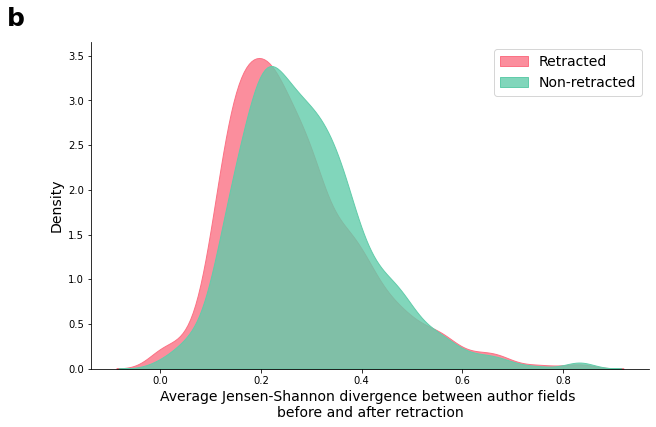

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
fontsize = 14

color_treatment = '#fb7285'
color_control = '#62ccaa'

# Create the KDE plot
plt.figure(figsize=(10, 6))


# KDE plot for retracted
sns.kdeplot(treatment_relevant['Dist'], color=color_treatment, label='Retracted', shade=True, alpha=0.8)


# KDE plot for matched
sns.kdeplot(control_average['Dist'], color=color_control, label='Non-retracted', shade=True, alpha=0.8)

# Add title and labels
# Add bold (a) to top left
plt.text(-0.15, 1.05, 'b', transform=plt.gca().transAxes, fontsize=25, fontweight='bold', ha='left')
plt.xlabel('Average Jensen-Shannon divergence between author fields \nbefore and after retraction', fontsize=fontsize)
plt.ylabel('Density',fontsize=fontsize)

# Add legend
plt.legend(fontsize=fontsize)

sns.despine()

# Show the plot
plt.savefig(OUTDIR+"author_field_analysis_new.pdf", format='pdf')